# CA1 Sem 1 Repeat Housing / Construction Data Assignment for sba22232

## Importing the libaries I plan on using during my assignment -

In [123]:
import pandas as pd
import seaborn as sns
import statistics as stats
import numpy as np
import matplotlib.pyplot as plt
import re
import missingno as msno 
import sklearn

from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

# Data prep on both Datasets

In [2]:
# List of the file names
file_names = ['ppr-2011-dublin.csv', 
              'ppr-2012-dublin.csv', 
              'ppr-2013-dublin.csv', 
              'ppr-2014-dublin.csv', 
              'ppr-2015-dublin.csv', 
              'ppr-2016-dublin.csv', 
              'ppr-2017-dublin.csv', 
              'ppr-2018-dublin.csv', 
              'ppr-2019-dublin.csv', 
              'ppr-2020.csv']

In [3]:
# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

In [4]:
# Loop through the list of file names and append the data to the combined_data DataFrame
for file_name in file_names:
    data = pd.read_csv(file_name)
    combined_data = pd.concat([combined_data, data], axis=0)

In [5]:
# Save the combined data to a new CSV file
combined_data.to_csv('combined_data.csv', index=False)

In [6]:
# Read in the combined data CSV file
data = pd.read_csv('combined_data.csv')
data.head()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (Eur),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2011,"251 Clontarf Road, Clontarf",Dublin 3,Dublin,"108,532.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN
1,04/01/2011,"22 St. Patrick's Park, Clondalkin",NaN,Dublin,"360,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,04/01/2011,"46 Longmeadows, Islandbridge",Dublin 8,Dublin,"254,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2011,"60 WOODSIDE, RATHFARNHAM, DUBLIN 14",Dublin 14,Dublin,"445,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2011,"9 Shandon Crescent, Phibsboro, Dublin 7",NaN,Dublin,"220,000.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166342 entries, 0 to 166341
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Date of Sale (dd/mm/yyyy)  166342 non-null  object
 1   Address                    166342 non-null  object
 2   Postal Code                77825 non-null   object
 3   County                     166342 non-null  object
 4   Price (Eur)                166342 non-null  object
 5   Not Full Market Price      166342 non-null  object
 6   VAT Exclusive              166342 non-null  object
 7   Description of Property    166342 non-null  object
 8   Property Size Description  17515 non-null   object
dtypes: object(9)
memory usage: 11.4+ MB


In [8]:
data.shape

(166342, 9)

In [9]:
data.describe()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (Eur),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
count,166342,166342,77825,166342,166342,166342,166342,166342,17515
unique,2919,160505,31,26,14918,2,2,4,5
top,18/12/2020,"WALLSLOUGH VILLAGE, WALLSLOUGH",Dublin 15,Dublin,"250,000.00",No,No,Second-Hand Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
freq,847,7,9672,131732,1809,158478,137254,136763,13467


In [10]:
(data.isnull().sum()/(len(data)))*100

Date of Sale (dd/mm/yyyy)     0.000000
Address                       0.000000
Postal Code                  53.213861
County                        0.000000
Price (Eur)                   0.000000
Not Full Market Price         0.000000
VAT Exclusive                 0.000000
Description of Property       0.000000
Property Size Description    89.470489
dtype: float64

In [11]:
data['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/¡ras·n CÛnaithe Ath·imhe',
       'Teach/?ras?n C?naithe Nua'], dtype=object)

In [12]:
data['Property Size Description'].unique()

array([nan,
       'greater than or equal to 38 sq metres and less than 125 sq metres',
       'less than 38 sq metres', 'greater than 125 sq metres',
       'n?os l? n? 38 m?adar cearnach',
       'greater than or equal to 125 sq metres'], dtype=object)

In [13]:
data['Postal Code'].unique()

array(['Dublin 3', nan, 'Dublin 8', 'Dublin 14', 'Dublin 1', 'Dublin 7',
       'Dublin 4', 'Dublin 12', 'Dublin 5', 'Dublin 2', 'Dublin 16',
       'Dublin 9', 'Dublin 20', 'Dublin 15', 'Dublin 6', 'Dublin 22',
       'Dublin 6w', 'Dublin 17', 'Dublin 13', 'Dublin 11', 'Dublin 24',
       'Dublin 18', 'Dublin 10', 'Baile ¡tha Cliath 14',
       'Baile ?tha Cliath 17', 'Baile ¡tha Cliath 5', 'NÌ Bhaineann',
       'Baile ¡tha Cliath 3', 'Baile ¡tha Cliath 15',
       'Baile ¡tha Cliath 4', 'Baile ¡tha Cliath 9',
       'Baile ¡tha Cliath 18'], dtype=object)

In [14]:
data['County'].unique()

array(['Dublin', 'Tipperary', 'Kerry', 'Meath', 'Carlow', 'Kildare',
       'Waterford', 'Limerick', 'Louth', 'Roscommon', 'Cork', 'Clare',
       'Offaly', 'Laois', 'Galway', 'Leitrim', 'Donegal', 'Kilkenny',
       'Wexford', 'Longford', 'Cavan', 'Sligo', 'Wicklow', 'Mayo',
       'Westmeath', 'Monaghan'], dtype=object)

In [15]:
data.duplicated().sum()

199

In [16]:
# 1. Delete rows where County is not Dublin
data = data[~(data['County'] != 'Dublin')]

In [17]:
# 2. Remove rows with blank Postal Code
data = data.dropna(subset=['Postal Code'])

In [18]:
# 3. Drop Property Size Description column
data = data.drop('Property Size Description', axis=1)

In [19]:
# 4. Split Address column by comma and keep only first two columns
data[['Address Line 1', 'Address Line 2']] = data['Address'].str.split(',', 1, expand=True)
data = data.drop('Address', axis=1)

In [20]:
# 5. Drop rows containing "Teach/¡ras·n CÛnaithe Ath·imhe" and "Teach/?ras?n C?naithe Nua"
data = data[~data['Description of Property'].isin(["Teach/¡ras·n CÛnaithe Ath·imhe", "Teach/?ras?n C?naithe Nua"])]

In [21]:
# 6. Replace commas with empty strings in the 'Price (Eur)' column
data['Price (Eur)'] = data['Price (Eur)'].str.replace(',', '')

In [22]:
# 7. Convert the 'Price (Eur)' column to a float dtype
data['Price (Eur)'] = data['Price (Eur)'].astype(float)

In [23]:
# 8. Convert the 'Date of Sale (dd/mm/yyyy)' column to a date dtype
data['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(data['Date of Sale (dd/mm/yyyy)'])

In [24]:
# 9. Drop rows containing "Yes" for "Not Full Market Price"
data = data[~data['Not Full Market Price'].isin(["Yes"])]

In [25]:
# 10. Split the 'Postal Code' column and keep only the number element
data['Dub_Code'] = data['Postal Code'].str.split().str[1]

In [26]:
# 11. Drop rows containing "6w"
data = data[~data['Dub_Code'].isin(["6w"])]

In [27]:
# 12. Split the 'Date of Sale (dd/mm/yyyy)' column and created a new column with only Year
data['Year'] = pd.to_datetime(data['Date of Sale (dd/mm/yyyy)']).dt.year

In [28]:
# 11. create a new column with year only
data['Year'] = pd.to_datetime(data['Date of Sale (dd/mm/yyyy)']).dt.year

In [29]:
# 13. Remove values not between 100000 & 2000000, removes site & commerical sales - Abitrary decision based on personal experience
data.drop(data[(data['Price (Eur)'] < 100000.00) | (data['Price (Eur)'] > 1000000.00)].index, inplace=True)

In [30]:
# Save the modified DataFrame to a new CSV file
data.to_csv('dublin_data.csv', index=False)

In [31]:
df1 = pd.read_csv('dublin_data.csv')
df1.head()

,Date of Sale (dd/mm/yyyy),Postal Code,County,Price (Eur),Not Full Market Price,VAT Exclusive,Description of Property,Address Line 1,Address Line 2,Dub_Code,Year
0,2011-04-01,Dublin 8,Dublin,254000.0,No,No,Second-Hand Dwelling house /Apartment,46 Longmeadows,Islandbridge,8,2011
1,2011-04-01,Dublin 14,Dublin,445000.0,No,No,Second-Hand Dwelling house /Apartment,60 WOODSIDE,"RATHFARNHAM, DUBLIN 14",14,2011
2,2011-04-01,Dublin 1,Dublin,290500.0,No,No,Second-Hand Dwelling house /Apartment,Apartment 24 Baltrasna House,"Spencer Dock, North Wall Quay",1,2011
3,2011-05-01,Dublin 7,Dublin,290000.0,No,No,Second-Hand Dwelling house /Apartment,13 Linenhall Terrace,Broadstone,7,2011
4,2011-05-01,Dublin 4,Dublin,190000.0,No,No,Second-Hand Dwelling house /Apartment,2 Pembroke Cottages,"Ringsend, Dublin 4",4,2011


In [32]:
df1 = df1.reindex(columns=['Date of Sale (dd/mm/yyyy)', 'Year', 'Address Line 1', 'Address Line 2', 'Postal Code', 'Dub_Code', 'Price (Eur)', 'VAT Exclusive', 'Description of Property'])
df1.head()

,Date of Sale (dd/mm/yyyy),Year,Address Line 1,Address Line 2,Postal Code,Dub_Code,Price (Eur),VAT Exclusive,Description of Property
0,2011-04-01,2011,46 Longmeadows,Islandbridge,Dublin 8,8,254000.0,No,Second-Hand Dwelling house /Apartment
1,2011-04-01,2011,60 WOODSIDE,"RATHFARNHAM, DUBLIN 14",Dublin 14,14,445000.0,No,Second-Hand Dwelling house /Apartment
2,2011-04-01,2011,Apartment 24 Baltrasna House,"Spencer Dock, North Wall Quay",Dublin 1,1,290500.0,No,Second-Hand Dwelling house /Apartment
3,2011-05-01,2011,13 Linenhall Terrace,Broadstone,Dublin 7,7,290000.0,No,Second-Hand Dwelling house /Apartment
4,2011-05-01,2011,2 Pembroke Cottages,"Ringsend, Dublin 4",Dublin 4,4,190000.0,No,Second-Hand Dwelling house /Apartment


In [33]:
df1.select_dtypes(exclude="number").describe()

,Date of Sale (dd/mm/yyyy),Address Line 1,Address Line 2,Postal Code,VAT Exclusive,Description of Property
count,68641,68641,68641,68641,68641,68641
unique,2685,63054,13175,21,2,2
top,2015-01-28,APT 1,"CLONDALKIN, DUBLIN 22",Dublin 15,No,Second-Hand Dwelling house /Apartment
freq,305,220,1042,8647,60181,60065


In [34]:
df1['Postal Code'].unique()

array(['Dublin 8', 'Dublin 14', 'Dublin 1', 'Dublin 7', 'Dublin 4',
       'Dublin 12', 'Dublin 5', 'Dublin 2', 'Dublin 16', 'Dublin 9',
       'Dublin 20', 'Dublin 15', 'Dublin 6', 'Dublin 3', 'Dublin 22',
       'Dublin 17', 'Dublin 13', 'Dublin 11', 'Dublin 24', 'Dublin 18',
       'Dublin 10'], dtype=object)

# Both Datasets are cleaned and prepared for analysis, next I will run through my Descriptive analysis

### EU House Price index Dataset

In [35]:
pi = pd.read_csv('priceindexcities.csv')
pi.head()

,Geo,Price_Index,Year,Quarter
0,AT,74.05,2010,Q1
1,AT,76.54,2010,Q2
2,AT,78.16,2010,Q3
3,AT,78.44,2010,Q4
4,AT,79.01,2011,Q1


In [36]:
pi.tail()

,Geo,Price_Index,Year,Quarter
1716,SK,163.28,2021,Q4
1717,SK,166.46,2022,Q1
1718,SK,175.62,2022,Q2
1719,SK,180.61,2022,Q3
1720,SK,179.18,2022,Q4


In [37]:
pi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Geo          1721 non-null   object 
 1   Price_Index  1721 non-null   float64
 2   Year         1721 non-null   int64  
 3   Quarter      1721 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 53.9+ KB


In [38]:
pi.describe()

,Price_Index,Year
count,1721.000000,1721.000000
mean,111.536299,2014.134224
std,26.383636,4.915684
min,49.470000,2005.000000
25%,95.950000,2010.000000
50%,105.410000,2014.000000
75%,123.770000,2018.000000
max,261.440000,2022.000000


In [39]:
pi.select_dtypes(exclude="number").head()

,Geo,Quarter
0,AT,Q1
1,AT,Q2
2,AT,Q3
3,AT,Q4
4,AT,Q1


In [40]:
pi.select_dtypes(exclude="number").describe()

,Geo,Quarter
count,1721,1721
unique,26,4
top,IE,Q4
freq,72,431


In [41]:
pi.shape

(1721, 4)

In [42]:
(pi.isnull().sum()/(len(data)))*100

Geo            0.0
Price_Index    0.0
Year           0.0
Quarter        0.0
dtype: float64

In [43]:
pi['Geo'].unique()

array(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR',
       'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT',
       'RO', 'SE', 'SI', 'SK'], dtype=object)

In [44]:
pi['Price_Index'].unique()

array([ 74.05,  76.54,  78.16, ..., 175.62, 180.61, 179.18])

In [45]:
pi['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2005, 2006, 2007, 2008, 2009])

In [46]:
pi['Quarter'].unique()

array(['Q1', 'Q2', 'Q3', 'Q4'], dtype=object)

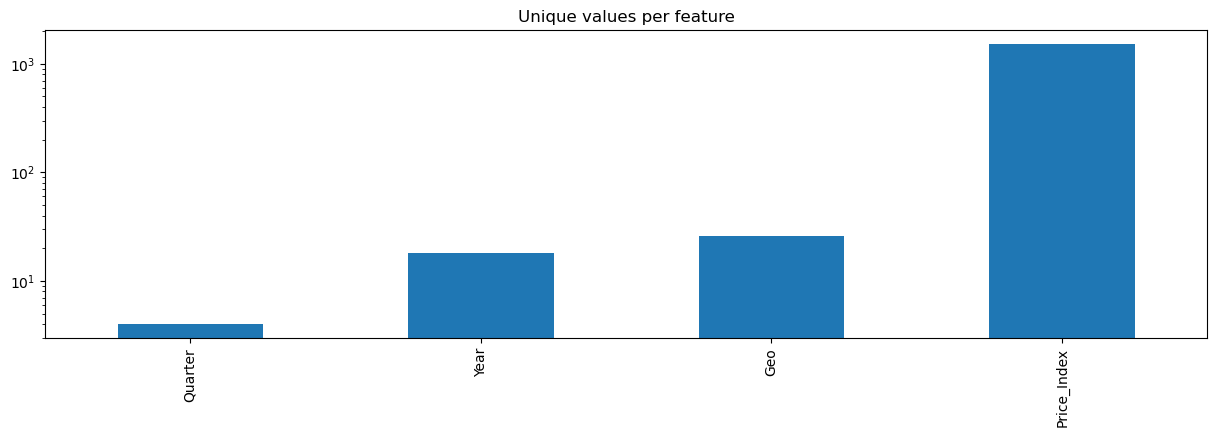

In [47]:
# For each numerical feature compute number of unique entries
unique_values = pi.nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [48]:
pi.duplicated().sum()

0

In [49]:
pi.isna()

,Geo,Price_Index,Year,Quarter
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
1716,False,False,False,False
1717,False,False,False,False
1718,False,False,False,False
1719,False,False,False,False


<AxesSubplot:>

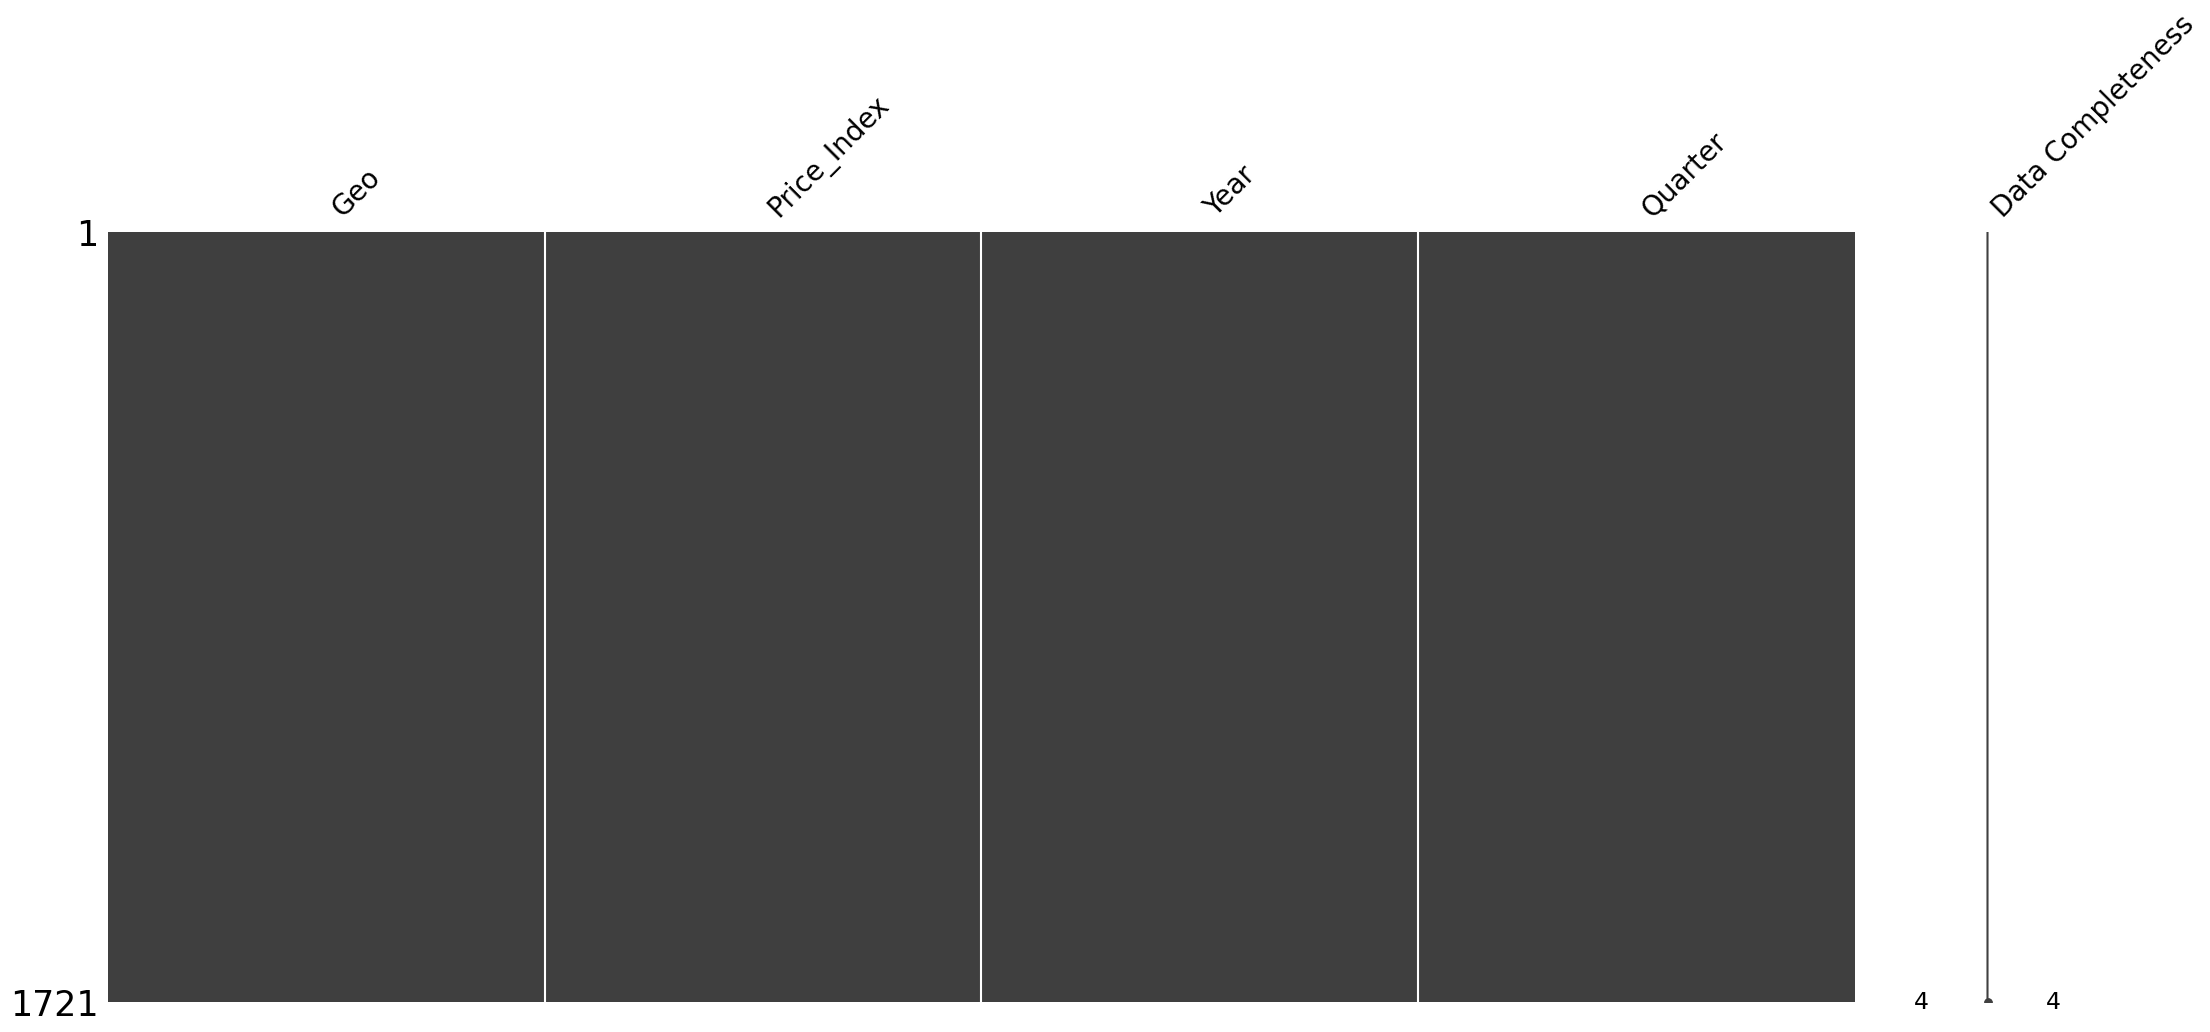

In [50]:
# Displays the completeness of the dataset and where the missing values are
msno.matrix(pi, labels=True, sort="descending", fontsize=20)

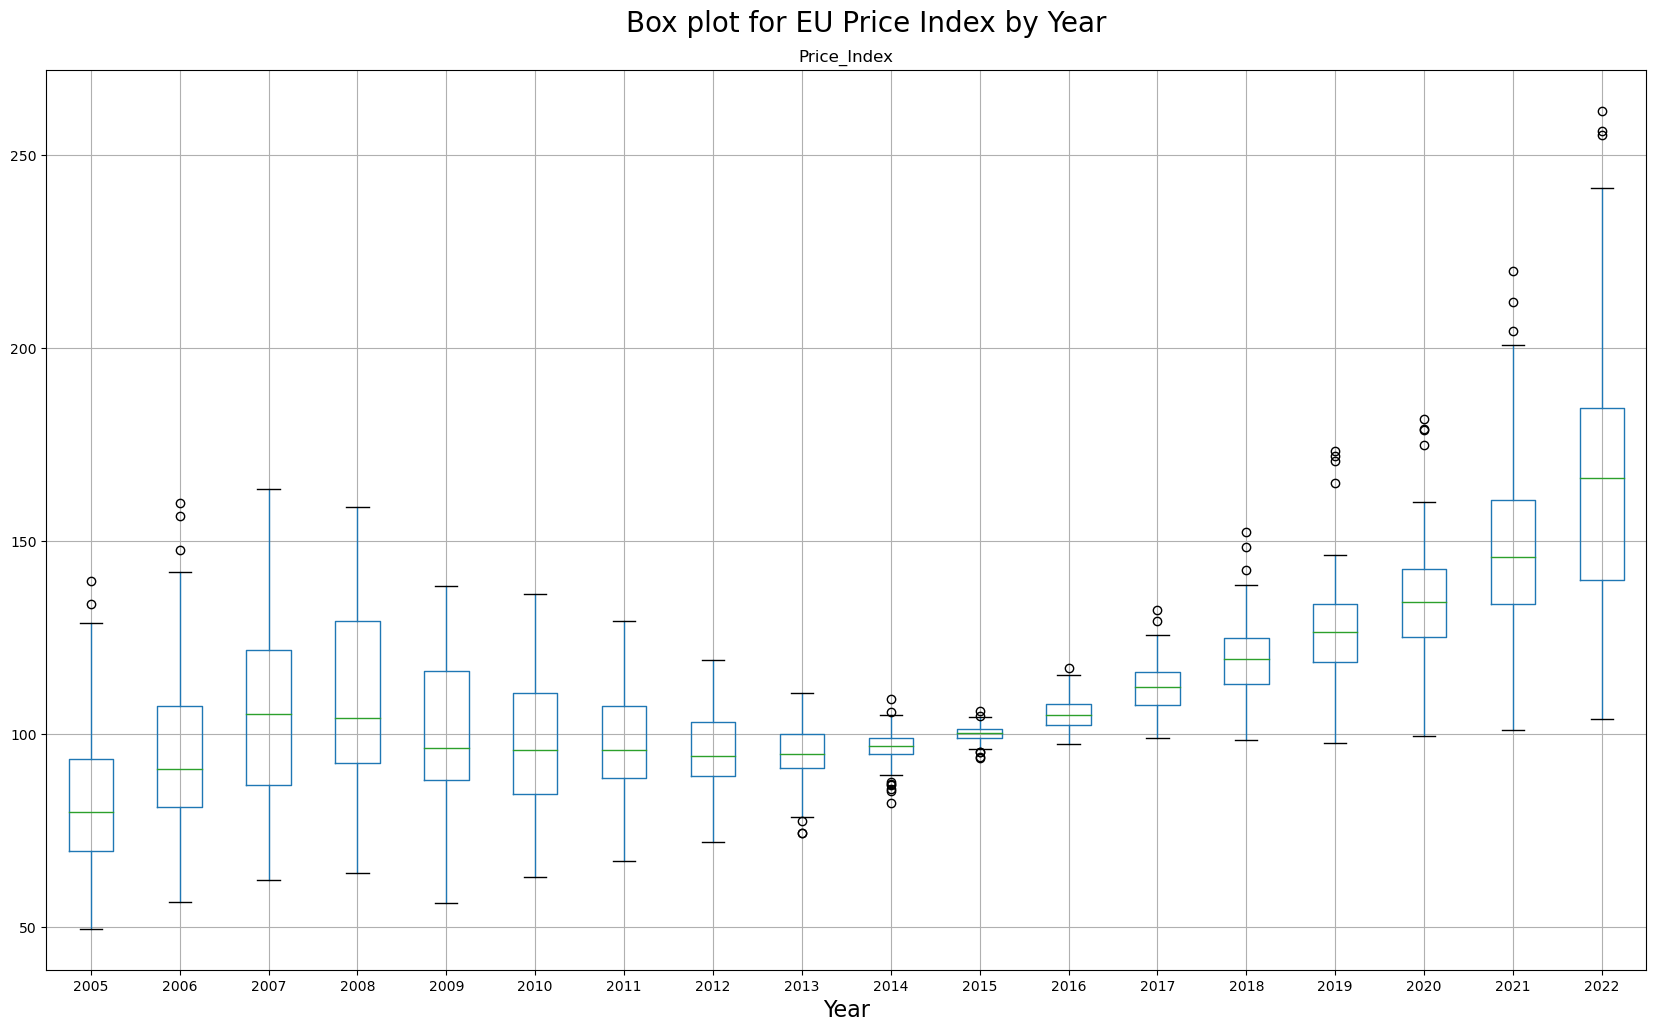

In [51]:
# Creates a boxplot to show an Element based on Item and Value
pi.boxplot(column =['Price_Index'], by = ['Year'], figsize =(20,12))

plt.suptitle("Box plot for EU Price Index by Year", fontsize=20, color="Black", x=0.51, y=0.95)
plt.xlabel("Year", fontsize=16)

plt.show()

In [52]:
# Here I group the data by Country and Price Index then sort by the mean column to identify where Ireland sits on the list.
group_code = pi.groupby('Geo')['Price_Index'].describe()

result_pi = group_code.sort_values('mean', ascending=False)

result_pi

,count,mean,std,min,25%,50%,75%,max
Geo,,,,,,,,
HU,64.0,127.318750,49.332366,84.13,91.9250,101.975,155.4975,261.44
ES,69.0,122.725942,17.185359,95.20,105.7800,126.260,136.2600,150.90
IE,72.0,121.881667,27.989342,74.32,99.6350,126.630,141.7350,168.52
SI,64.0,121.822187,19.215013,97.77,108.5275,118.060,129.1400,178.41
CZ,60.0,121.613333,36.583953,93.60,95.3750,101.900,138.0500,219.40
PT,60.0,121.126333,29.013951,92.25,100.6300,107.530,138.0175,195.91
LV,68.0,119.462353,29.404879,78.52,95.8075,110.470,144.0100,187.79
NL,72.0,119.285417,23.536081,95.02,104.9175,111.595,122.6425,189.33
HR,60.0,116.572000,16.483035,99.13,104.6100,110.920,123.3950,170.11


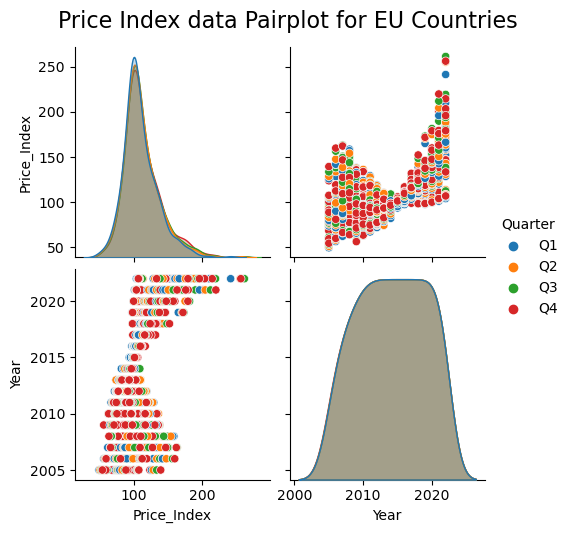

In [53]:
# Here I am using Pairplot here to further identify any additonal correlations in the data for the EU

ax_ptrans = sns.pairplot(pi, hue='Quarter')

plt.suptitle("Price Index data Pairplot for EU Countries", fontsize=16, color="black", x=0.51, y=1.05)

plt.show()

array([[<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>]], dtype=objec

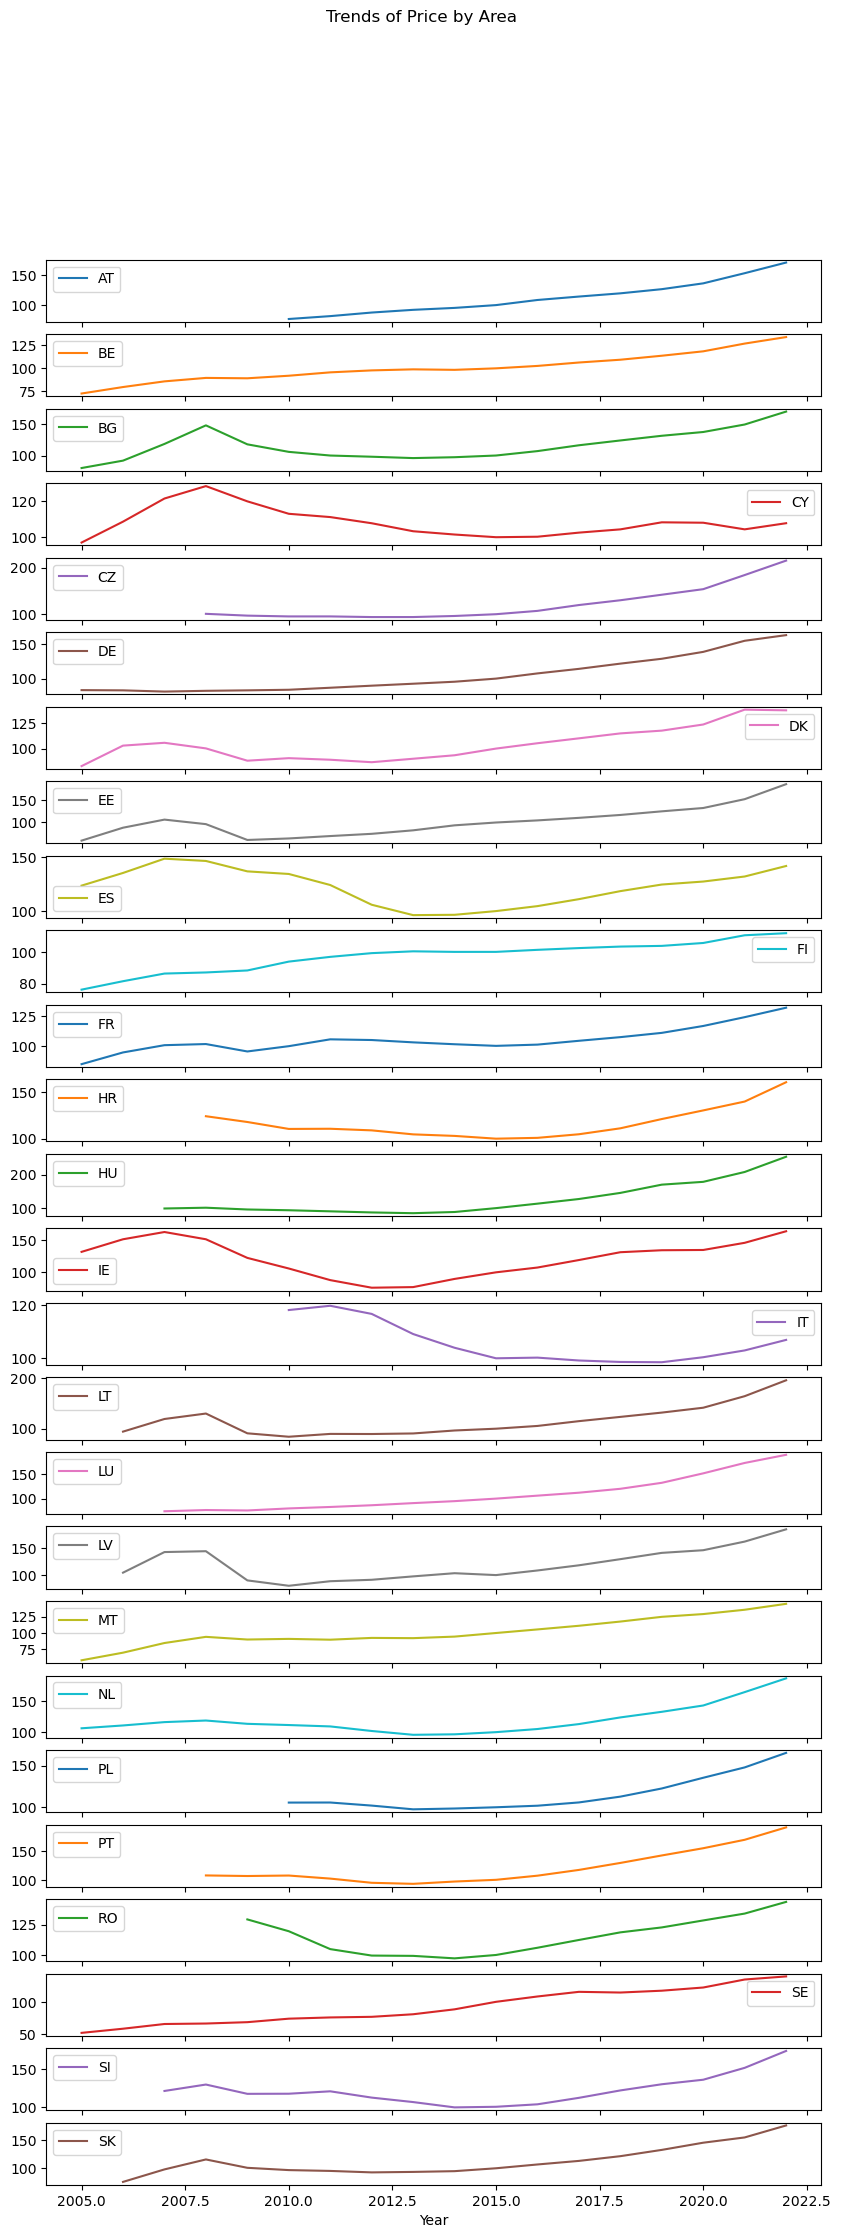

In [54]:
pd.pivot_table(pi.reset_index(),
               index='Year', columns='Geo', values='Price_Index'
              ).plot(subplots=True, layout=(26,1), figsize =(10,25), title=('Trends of Price by Area'))

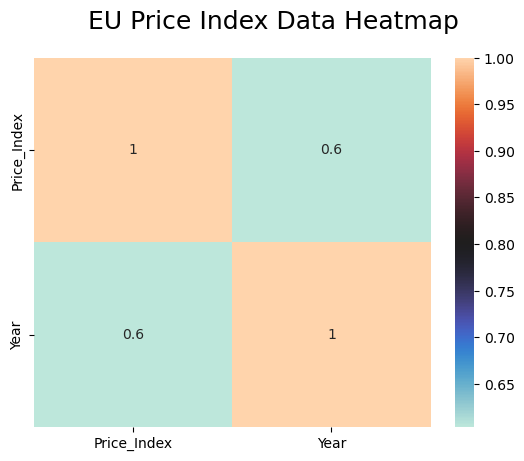

In [55]:
corelation = pi.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, cmap="icefire")

plt.suptitle("EU Price Index Data Heatmap", fontsize=18, color="Black")

plt.show()

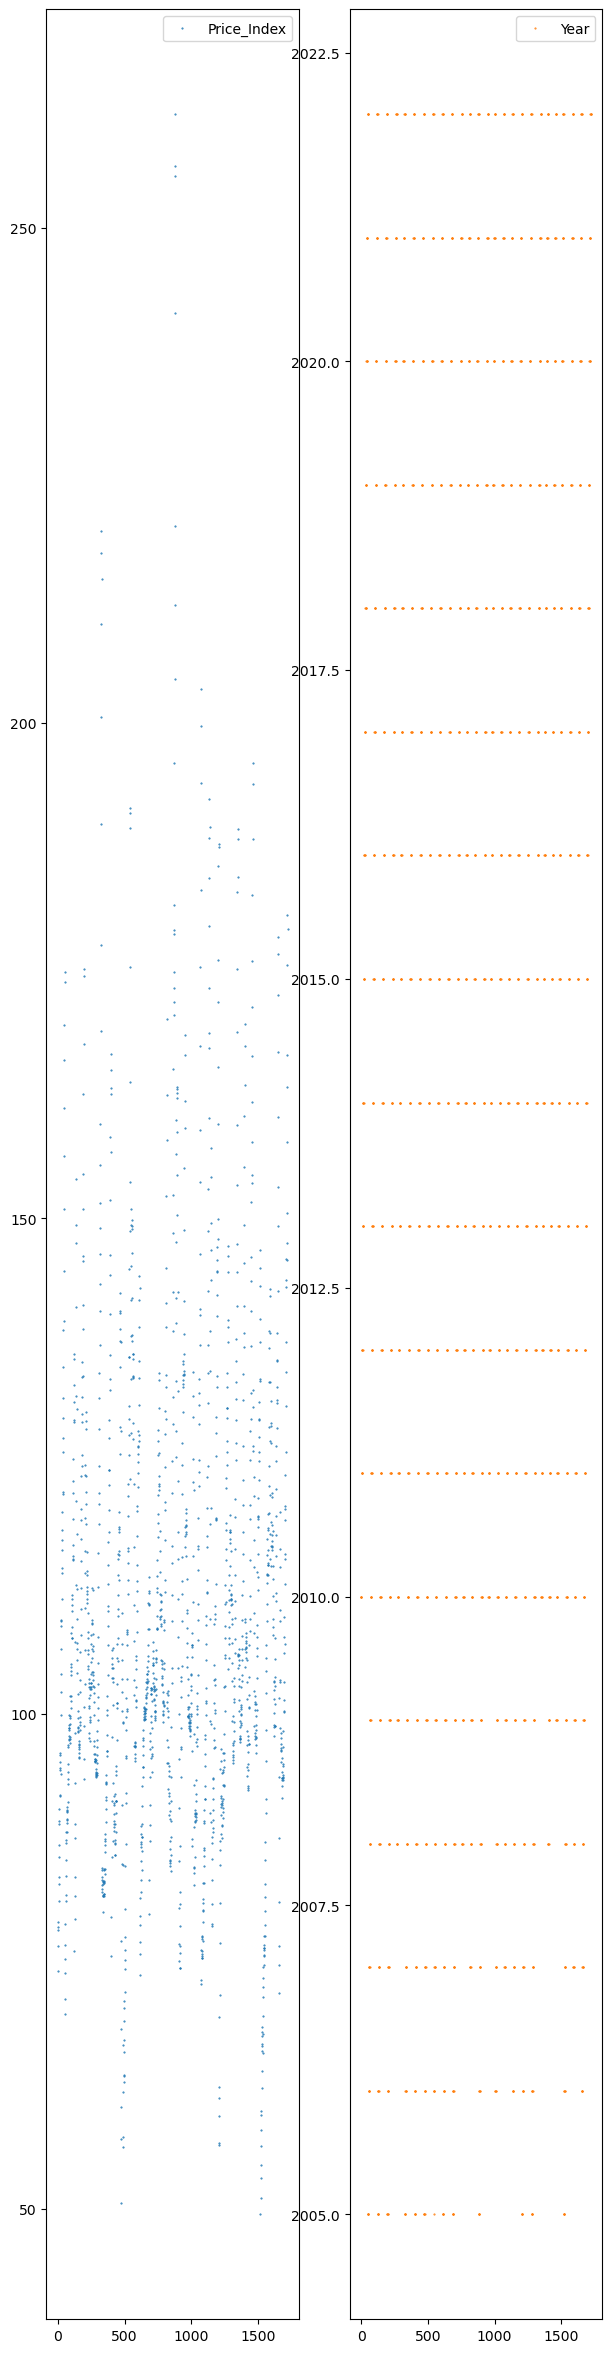

In [56]:
# Displays a global view of the dataset for only numerical features
pi.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

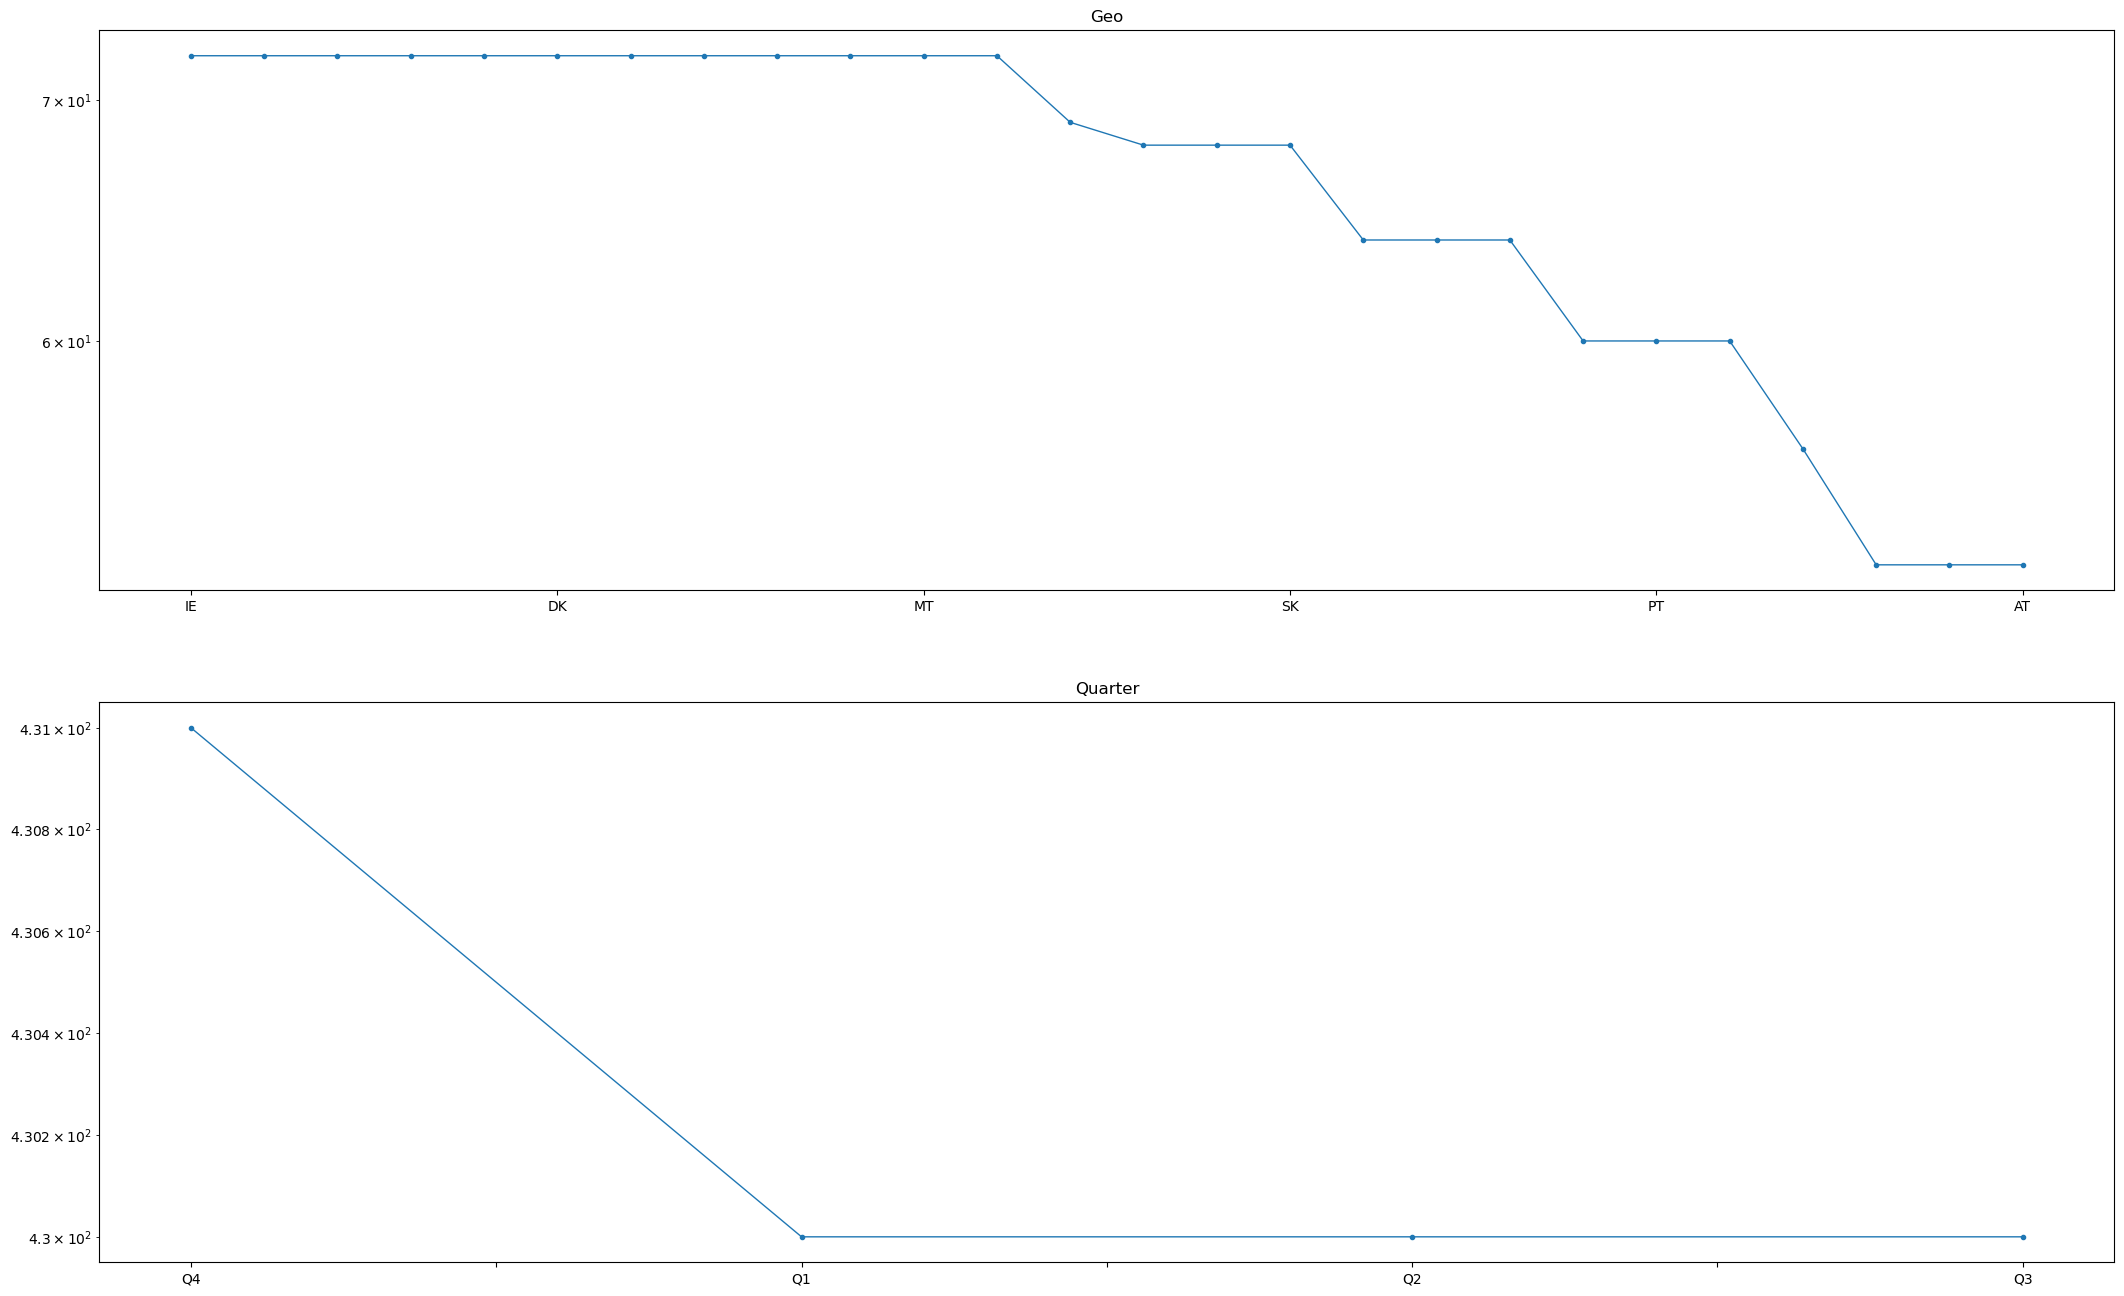

In [57]:
# Displays a global view of the dataset for non numerical features by excluding the numerical entries
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(26, 16))

# Identify non-numerical features
pi_non_numerical = pi.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(pi_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    pi_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=1, marker=".", ax=ax)
    
plt.show();

### Dublin House Price Dataset 

In [58]:
df1.head()

,Date of Sale (dd/mm/yyyy),Year,Address Line 1,Address Line 2,Postal Code,Dub_Code,Price (Eur),VAT Exclusive,Description of Property
0,2011-04-01,2011,46 Longmeadows,Islandbridge,Dublin 8,8,254000.0,No,Second-Hand Dwelling house /Apartment
1,2011-04-01,2011,60 WOODSIDE,"RATHFARNHAM, DUBLIN 14",Dublin 14,14,445000.0,No,Second-Hand Dwelling house /Apartment
2,2011-04-01,2011,Apartment 24 Baltrasna House,"Spencer Dock, North Wall Quay",Dublin 1,1,290500.0,No,Second-Hand Dwelling house /Apartment
3,2011-05-01,2011,13 Linenhall Terrace,Broadstone,Dublin 7,7,290000.0,No,Second-Hand Dwelling house /Apartment
4,2011-05-01,2011,2 Pembroke Cottages,"Ringsend, Dublin 4",Dublin 4,4,190000.0,No,Second-Hand Dwelling house /Apartment


In [59]:
df1.tail()

,Date of Sale (dd/mm/yyyy),Year,Address Line 1,Address Line 2,Postal Code,Dub_Code,Price (Eur),VAT Exclusive,Description of Property
68636,2020-12-30,2020,9 THE LAWN,"BODEN PARK, RATHFARNHAM",Dublin 16,16,490000.0,No,Second-Hand Dwelling house /Apartment
68637,2020-12-31,2020,10 HARTY PLACE,"CLANBRASSIL ST, DUBLIN 8",Dublin 8,8,214000.0,No,Second-Hand Dwelling house /Apartment
68638,2020-12-31,2020,23 BEECHFIELD RD,"CLONEE, DUBLIN 15",Dublin 15,15,300000.0,No,Second-Hand Dwelling house /Apartment
68639,2020-12-31,2020,30 LOWER RATHMINES RD,"DUBLIN 6, DUBLIN",Dublin 6,6,950000.0,No,Second-Hand Dwelling house /Apartment
68640,2020-12-31,2020,53 TRIMBLESTON,"GOATSTOWN, DUBLIN 14",Dublin 14,14,400000.0,No,Second-Hand Dwelling house /Apartment


In [60]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68641 entries, 0 to 68640
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date of Sale (dd/mm/yyyy)  68641 non-null  object 
 1   Year                       68641 non-null  int64  
 2   Address Line 1             68641 non-null  object 
 3   Address Line 2             68641 non-null  object 
 4   Postal Code                68641 non-null  object 
 5   Dub_Code                   68641 non-null  int64  
 6   Price (Eur)                68641 non-null  float64
 7   VAT Exclusive              68641 non-null  object 
 8   Description of Property    68641 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 4.7+ MB


In [61]:
df1.describe()

,Year,Dub_Code,Price (Eur)
count,68641.000000,68641.000000,68641.000000
mean,2016.485118,11.814761,342236.474342
std,2.297026,6.249093,172097.679252
min,2011.000000,1.000000,100000.000000
25%,2015.000000,7.000000,220000.000000
50%,2017.000000,12.000000,300000.000000
75%,2018.000000,16.000000,420000.000000
max,2020.000000,24.000000,1000000.000000


In [62]:
df1.select_dtypes(exclude="number").head()

,Date of Sale (dd/mm/yyyy),Address Line 1,Address Line 2,Postal Code,VAT Exclusive,Description of Property
0,2011-04-01,46 Longmeadows,Islandbridge,Dublin 8,No,Second-Hand Dwelling house /Apartment
1,2011-04-01,60 WOODSIDE,"RATHFARNHAM, DUBLIN 14",Dublin 14,No,Second-Hand Dwelling house /Apartment
2,2011-04-01,Apartment 24 Baltrasna House,"Spencer Dock, North Wall Quay",Dublin 1,No,Second-Hand Dwelling house /Apartment
3,2011-05-01,13 Linenhall Terrace,Broadstone,Dublin 7,No,Second-Hand Dwelling house /Apartment
4,2011-05-01,2 Pembroke Cottages,"Ringsend, Dublin 4",Dublin 4,No,Second-Hand Dwelling house /Apartment


In [63]:
df1.select_dtypes(exclude="number").describe()

,Date of Sale (dd/mm/yyyy),Address Line 1,Address Line 2,Postal Code,VAT Exclusive,Description of Property
count,68641,68641,68641,68641,68641,68641
unique,2685,63054,13175,21,2,2
top,2015-01-28,APT 1,"CLONDALKIN, DUBLIN 22",Dublin 15,No,Second-Hand Dwelling house /Apartment
freq,305,220,1042,8647,60181,60065


In [64]:
df1.shape

(68641, 9)

In [65]:
(df1.isnull().sum()/(len(data)))*100

Date of Sale (dd/mm/yyyy)    0.0
Year                         0.0
Address Line 1               0.0
Address Line 2               0.0
Postal Code                  0.0
Dub_Code                     0.0
Price (Eur)                  0.0
VAT Exclusive                0.0
Description of Property      0.0
dtype: float64

In [66]:
df1['Dub_Code'].unique()

array([ 8, 14,  1,  7,  4, 12,  5,  2, 16,  9, 20, 15,  6,  3, 22, 17, 13,
       11, 24, 18, 10])

In [67]:
df1['Price (Eur)'].unique()

array([254000.  , 445000.  , 290500.  , ..., 418086.43, 370576.61,
       399082.5 ])

In [68]:
df1['Year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

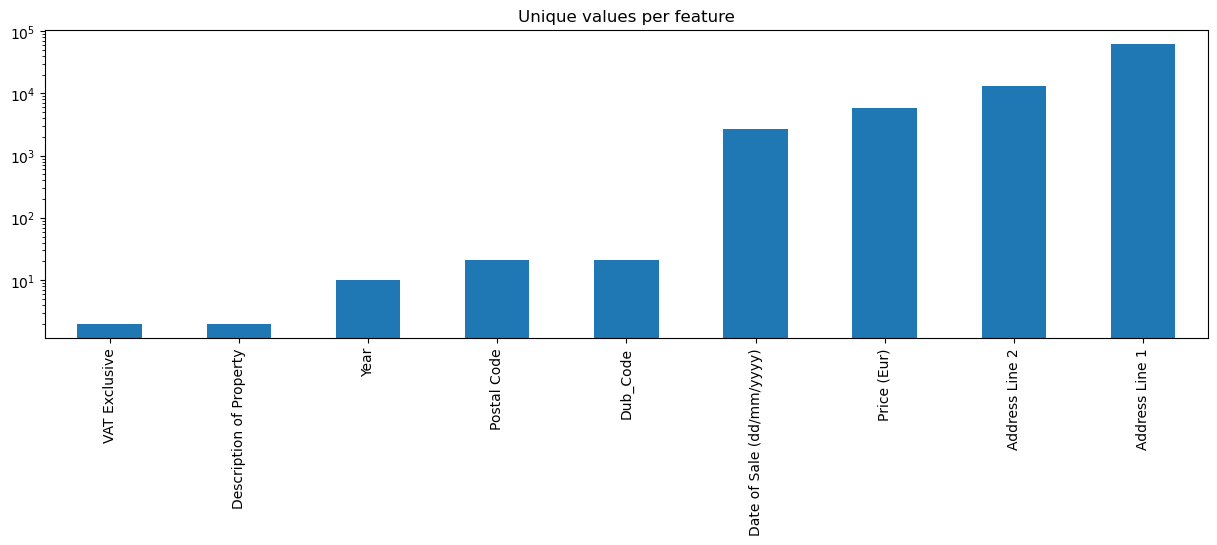

In [69]:
# For each numerical feature compute number of unique entries
unique_values = df1.nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

In [70]:
df1.duplicated().sum()

70

In [71]:
df1.isna()

,Date of Sale (dd/mm/yyyy),Year,Address Line 1,Address Line 2,Postal Code,Dub_Code,Price (Eur),VAT Exclusive,Description of Property
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
68636,False,False,False,False,False,False,False,False,False
68637,False,False,False,False,False,False,False,False,False
68638,False,False,False,False,False,False,False,False,False
68639,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

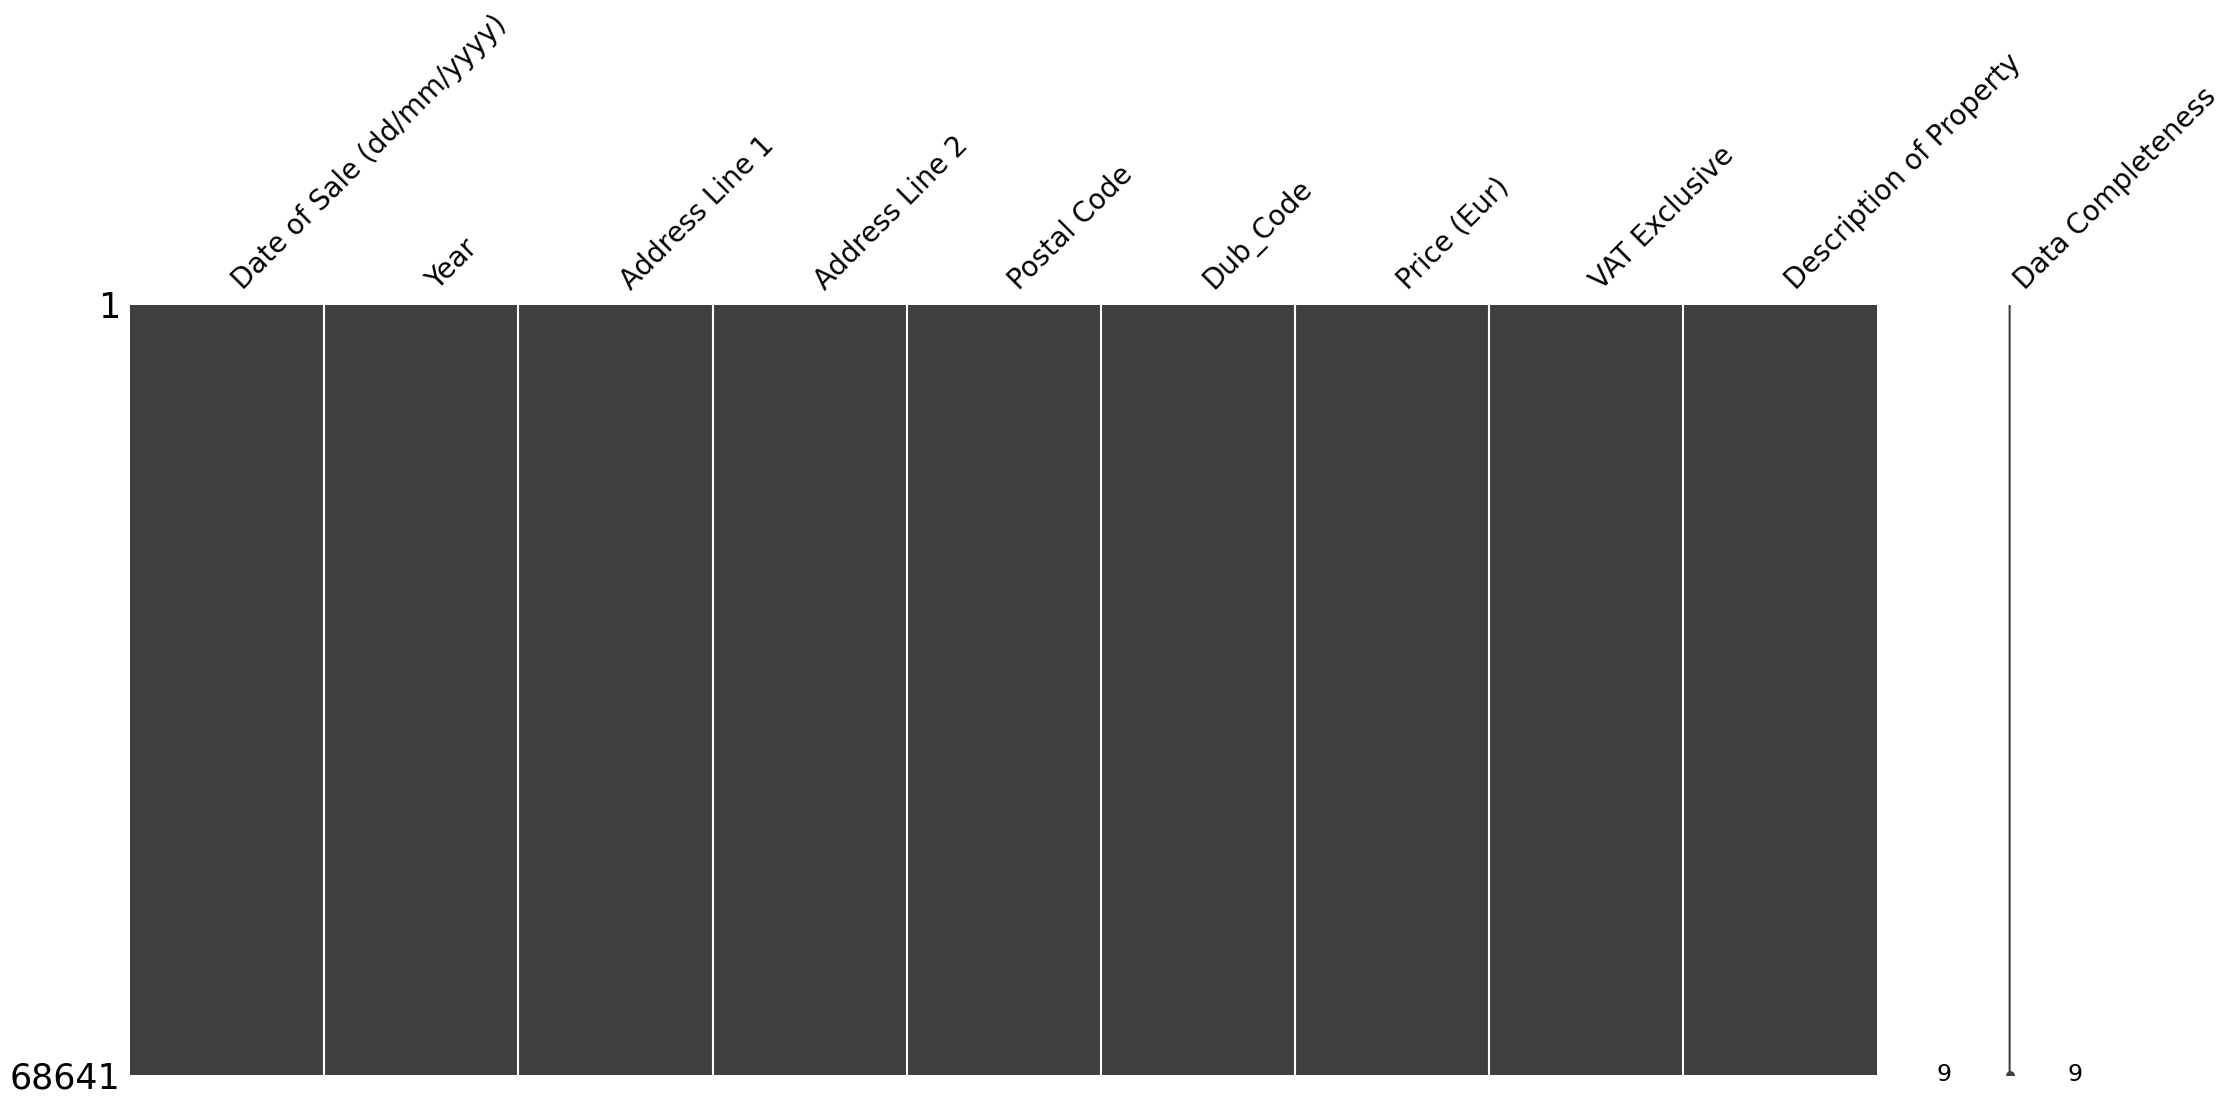

In [72]:
# Displays the completeness of the dataset and where the missing values are
msno.matrix(df1, labels=True, sort="descending", fontsize=20)

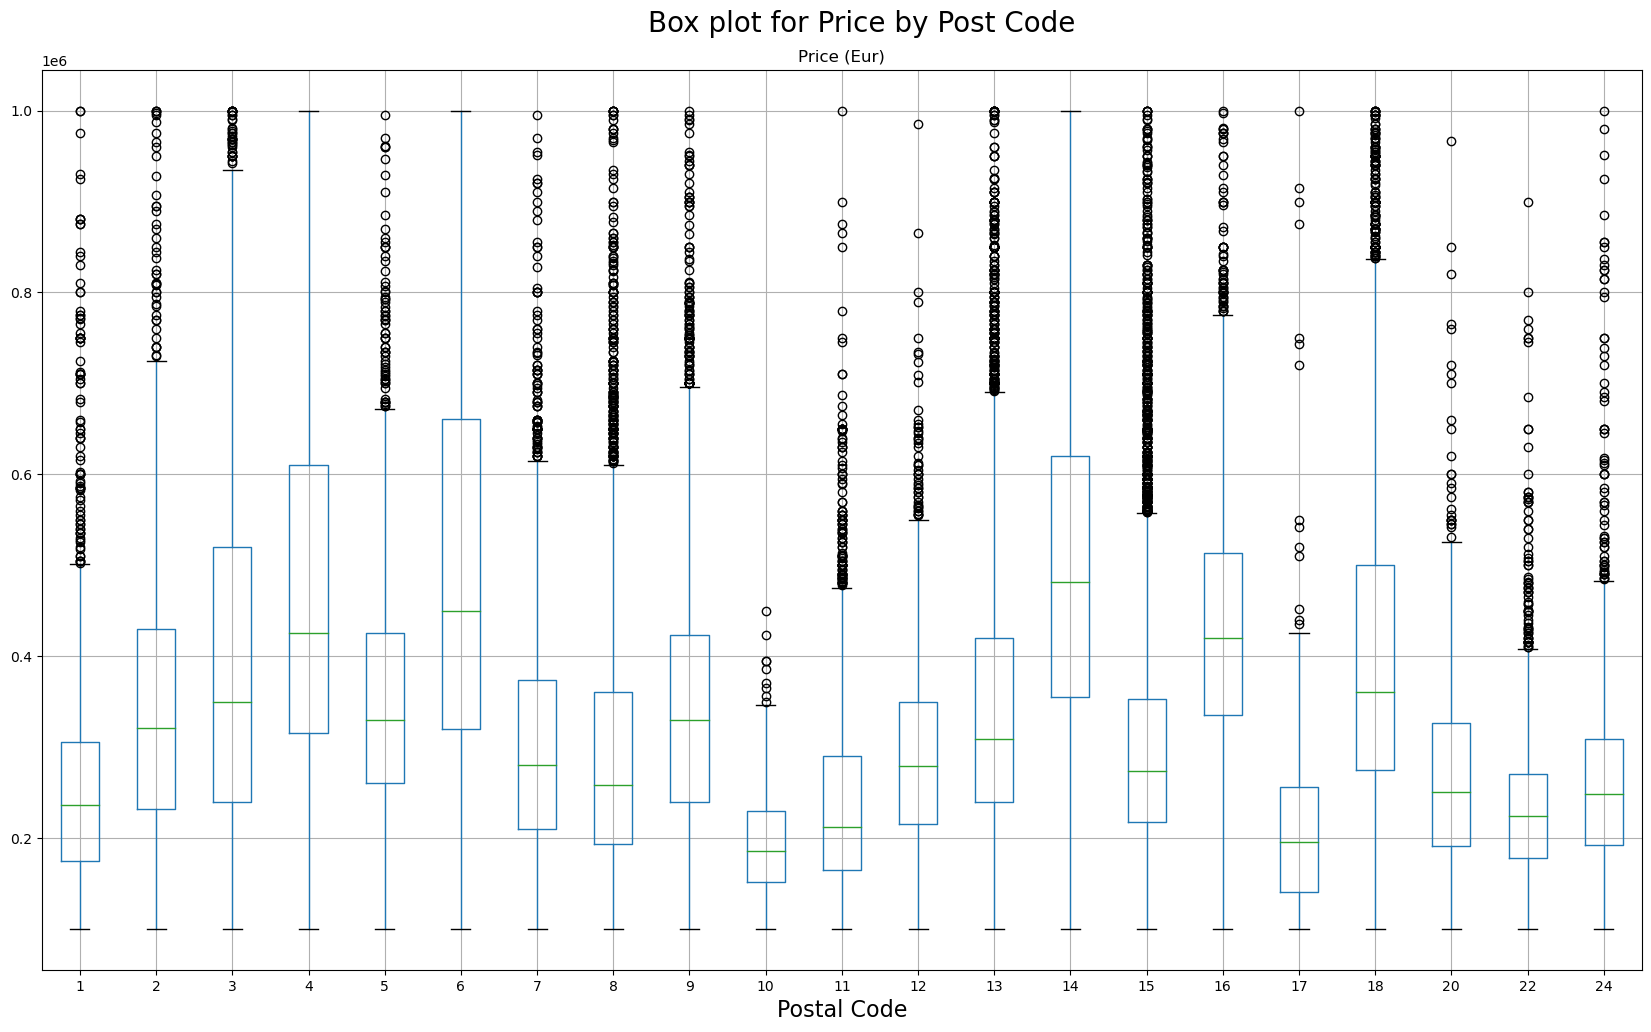

In [73]:
# Creates a boxplot to show an Element based on Item and Value
df1.boxplot(column =['Price (Eur)'], by = ['Dub_Code'], figsize =(20,12))

plt.suptitle("Box plot for Price by Post Code", fontsize=20, color="Black", x=0.51, y=0.95)
plt.xlabel("Postal Code", fontsize=16)

plt.show()

In [74]:
# Calculate the IQR of the 'Price (Eur)' column
q1 = df1['Price (Eur)'].quantile(0.25)
q3 = df1['Price (Eur)'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper limits for outliers
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

# Remove outliers from the 'Price (Eur)' column
df = df1[(df1['Price (Eur)'] >= lower_limit) & (data['Price (Eur)'] <= upper_limit)]

# Save the modified DataFrame to a new CSV file
df.to_csv('outliers_removed.csv', index=False)

df2 = pd.read_csv('outliers_removed.csv')
df2.head()

,Date of Sale (dd/mm/yyyy),Year,Address Line 1,Address Line 2,Postal Code,Dub_Code,Price (Eur),VAT Exclusive,Description of Property
0,2011-04-01,2011,Apartment 24 Baltrasna House,"Spencer Dock, North Wall Quay",Dublin 1,1,290500.0,No,Second-Hand Dwelling house /Apartment
1,2011-05-01,2011,13 Linenhall Terrace,Broadstone,Dublin 7,7,290000.0,No,Second-Hand Dwelling house /Apartment
2,2011-05-01,2011,282 Clonard Road,Crumlin,Dublin 12,12,170000.0,No,Second-Hand Dwelling house /Apartment
3,2011-05-01,2011,73 St Jarlath Road,Cabra,Dublin 7,7,225000.0,No,Second-Hand Dwelling house /Apartment
4,2011-06-01,2011,35 Trinity Square,Townsend Street,Dublin 2,2,180000.0,No,Second-Hand Dwelling house /Apartment


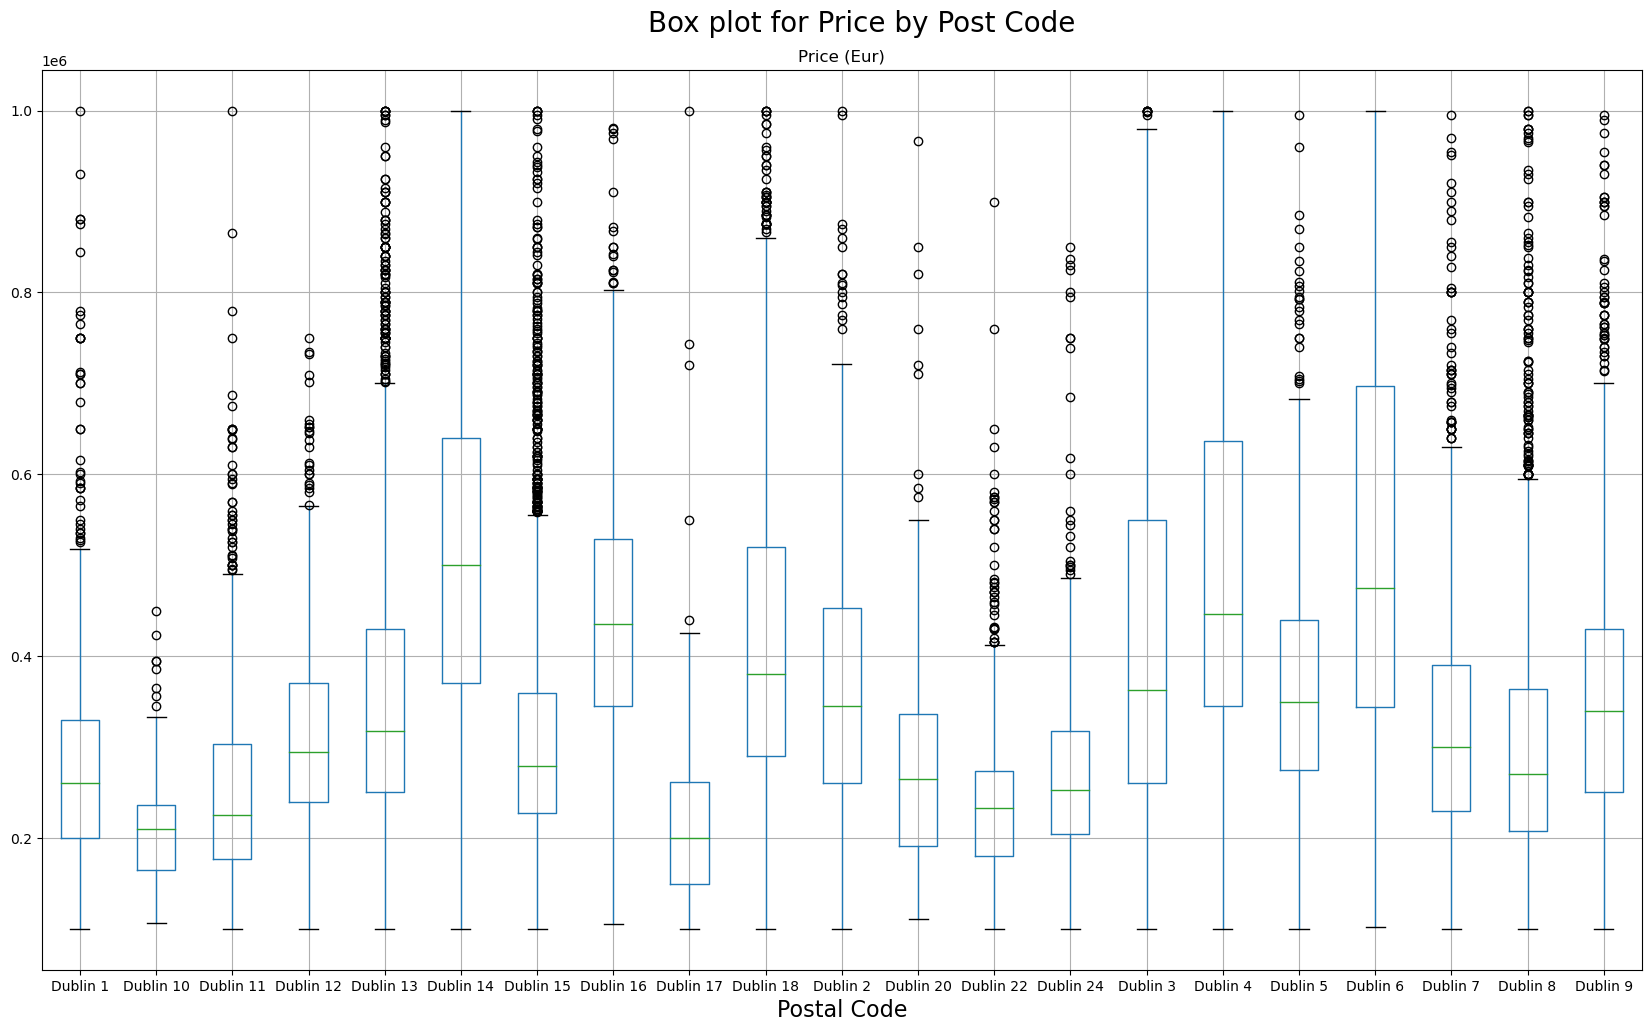

In [75]:
# Creates a boxplot to show an Element based on Item and Value
df2.boxplot(column =['Price (Eur)'], by = ['Postal Code'], figsize =(20,12))

plt.suptitle("Box plot for Price by Post Code", fontsize=20, color="Black", x=0.51, y=0.95)
plt.xlabel("Postal Code", fontsize=16)

plt.show()

In [76]:
# Here I group the data by Dublin post code and House Price then sort by the mean column to identify where most expensive on the list.
group_code2 = df2.groupby('Dub_Code')['Price (Eur)'].describe()

result_df2 = group_code2.sort_values('mean', ascending=False)

result_df2

,count,mean,std,min,25%,50%,75%,max
Dub_Code,,,,,,,,
6,1203.0,516201.745761,226545.378148,101672.00,343700.0,475000.00,697500.000,1000000.0
14,1511.0,513856.132614,183720.760582,100000.00,370000.0,500000.00,640000.000,1000000.0
4,1530.0,496631.825078,207645.306494,100000.00,345000.0,446500.00,636500.000,1000000.0
16,1571.0,443521.252527,134173.298638,105000.00,345000.0,435000.00,529074.705,981113.0
18,2267.0,420081.325082,172707.173237,100000.00,290000.0,380000.00,519823.395,1000000.0
3,1411.0,415953.397760,206389.033232,100000.00,260000.0,362500.00,550000.000,1000000.0
2,581.0,372392.047659,158511.471511,100000.00,260000.0,345000.00,452361.000,1000000.0
5,1192.0,370668.344547,133172.026221,100000.00,275000.0,350000.00,440000.000,995000.0
13,1710.0,366456.504655,177007.389044,100000.00,250000.0,317180.81,430000.000,1000000.0


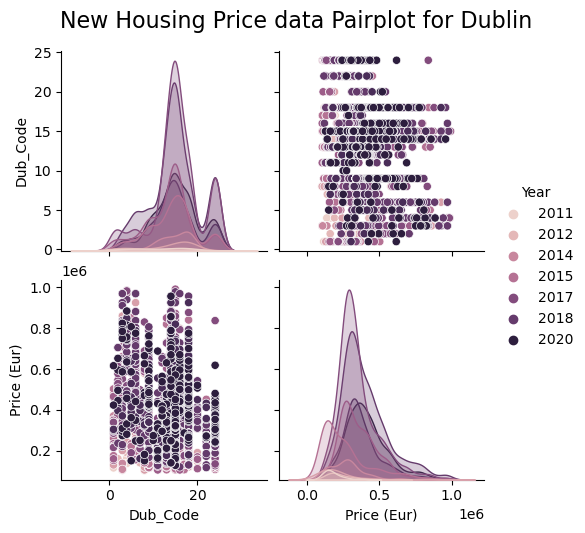

In [77]:
# I am using Pairplot here to further identify any additonal correlations in the data for Ireland

ax_ptrans = sns.pairplot(df2.loc[df2['Description of Property'] == 'New Dwelling house /Apartment'], hue='Year')

plt.suptitle("New Housing Price data Pairplot for Dublin", fontsize=16, color="black", x=0.51, y=1.05)

plt.show()

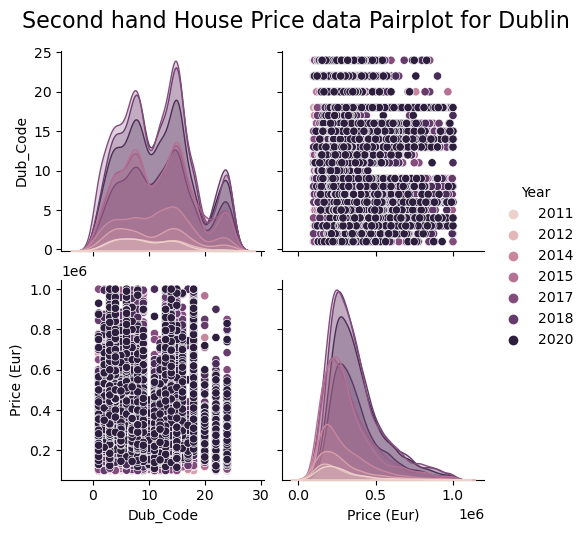

In [78]:
# I am using Pairplot here to further identify any additonal correlations in the data for Ireland

ax_ptrans = sns.pairplot(df2.loc[df2['Description of Property'] == 'Second-Hand Dwelling house /Apartment'], hue='Year')

plt.suptitle("Second hand House Price data Pairplot for Dublin", fontsize=16, color="black", x=0.51, y=1.05)

plt.show()

array([[<AxesSubplot:xlabel='Year'>],
       [<AxesSubplot:xlabel='Year'>]], dtype=object)

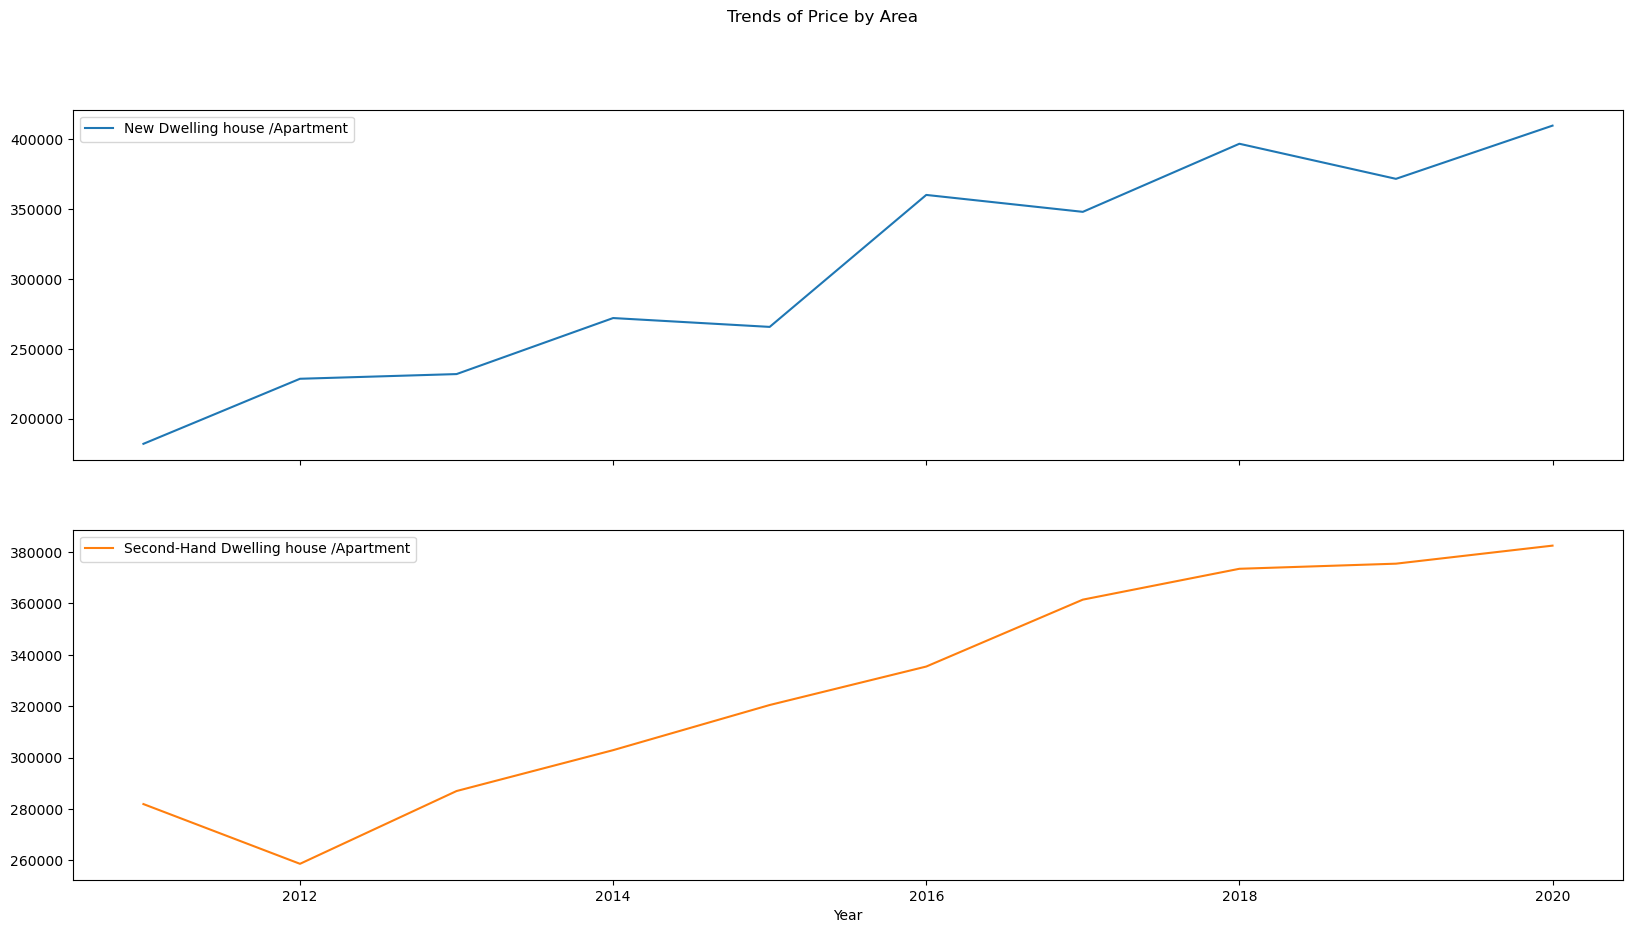

In [79]:
pd.pivot_table(df2.reset_index(),
               index='Year', columns='Description of Property', values='Price (Eur)'
              ).plot(subplots=True, layout=(2,1), figsize =(20,10), title=('Trends of Price by Area'))

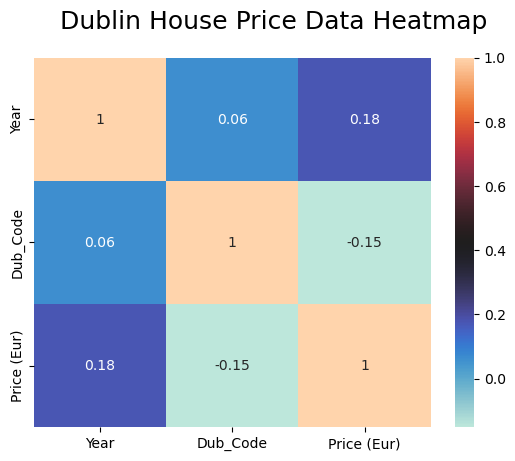

In [80]:
corelation = df2.corr()
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True, cmap="icefire")

plt.suptitle("Dublin House Price Data Heatmap", fontsize=18, color="Black")

plt.show()

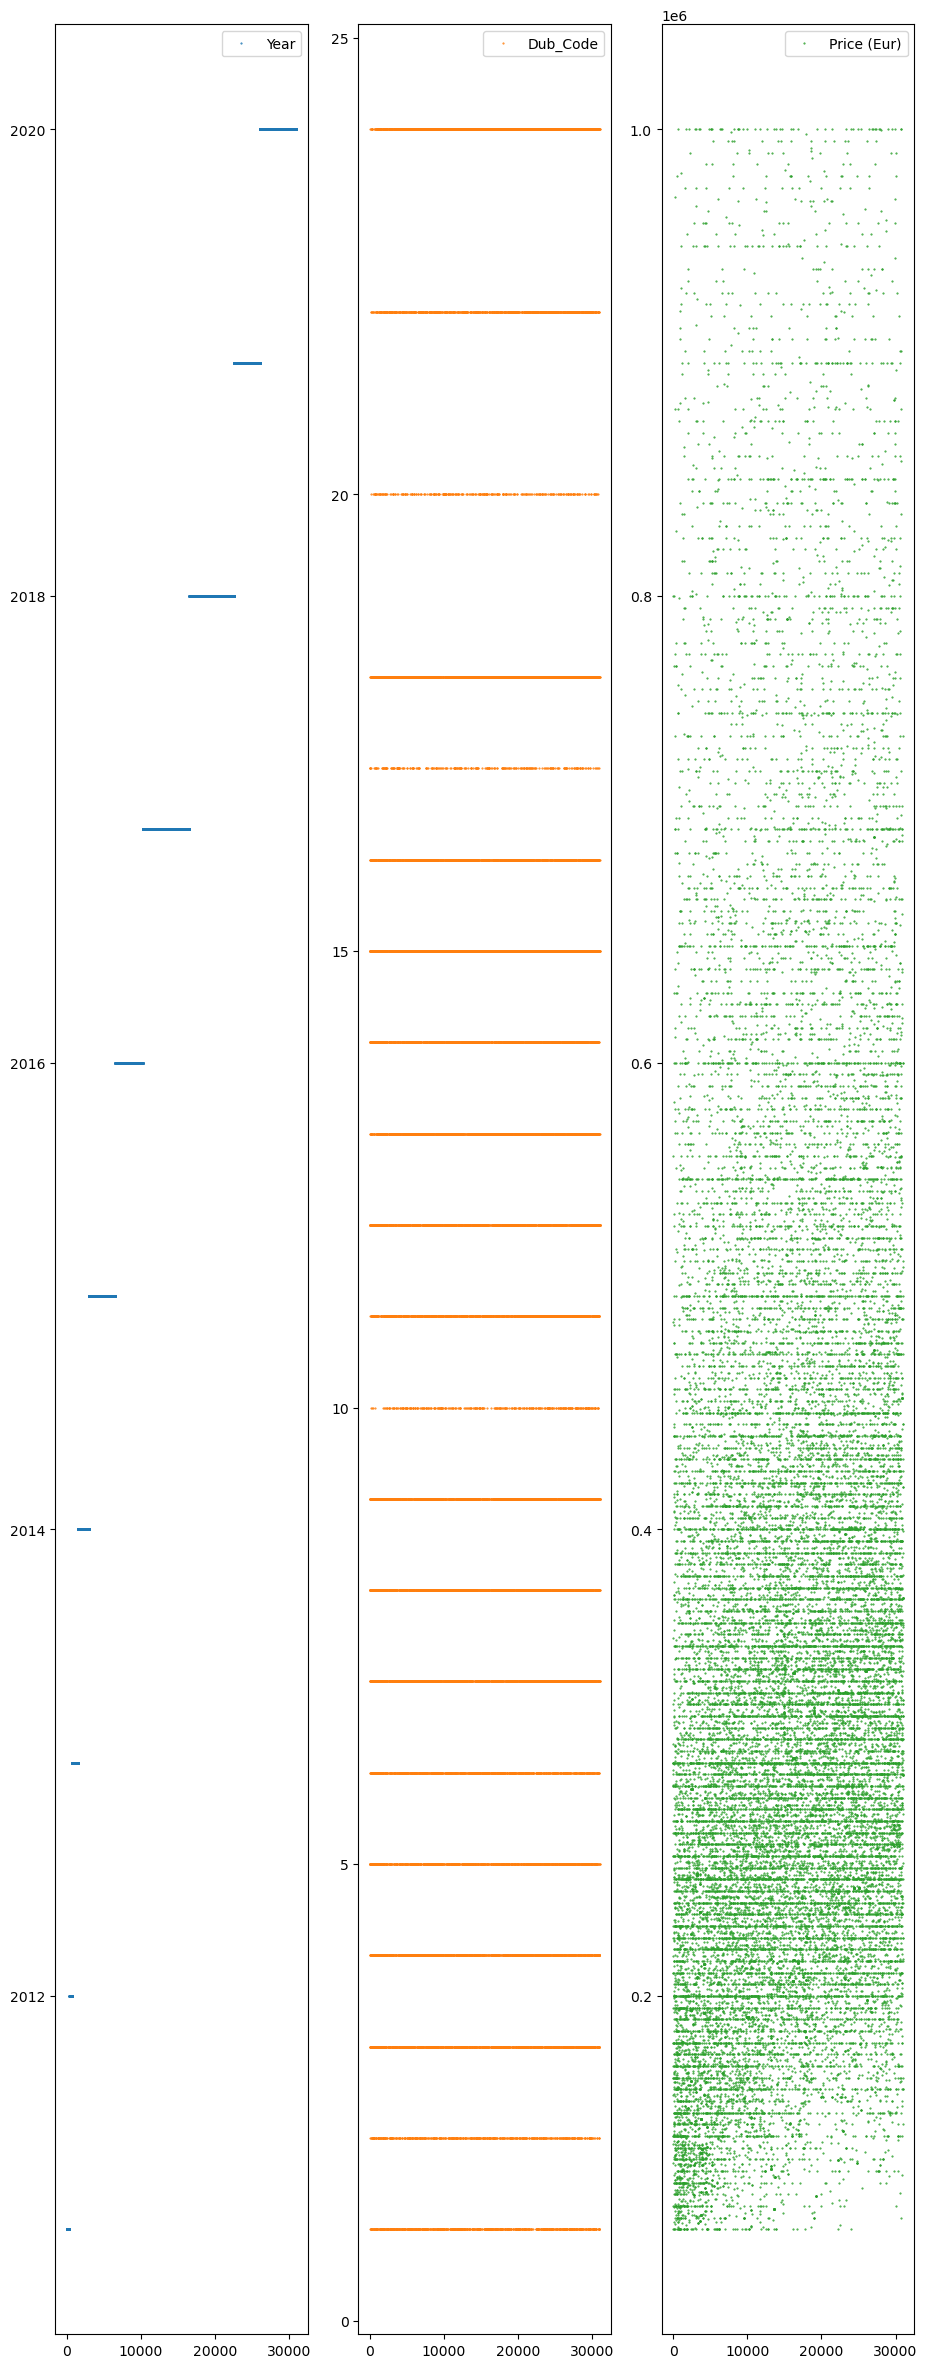

In [81]:
# Displays a global view of the dataset for only numerical features
df2.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

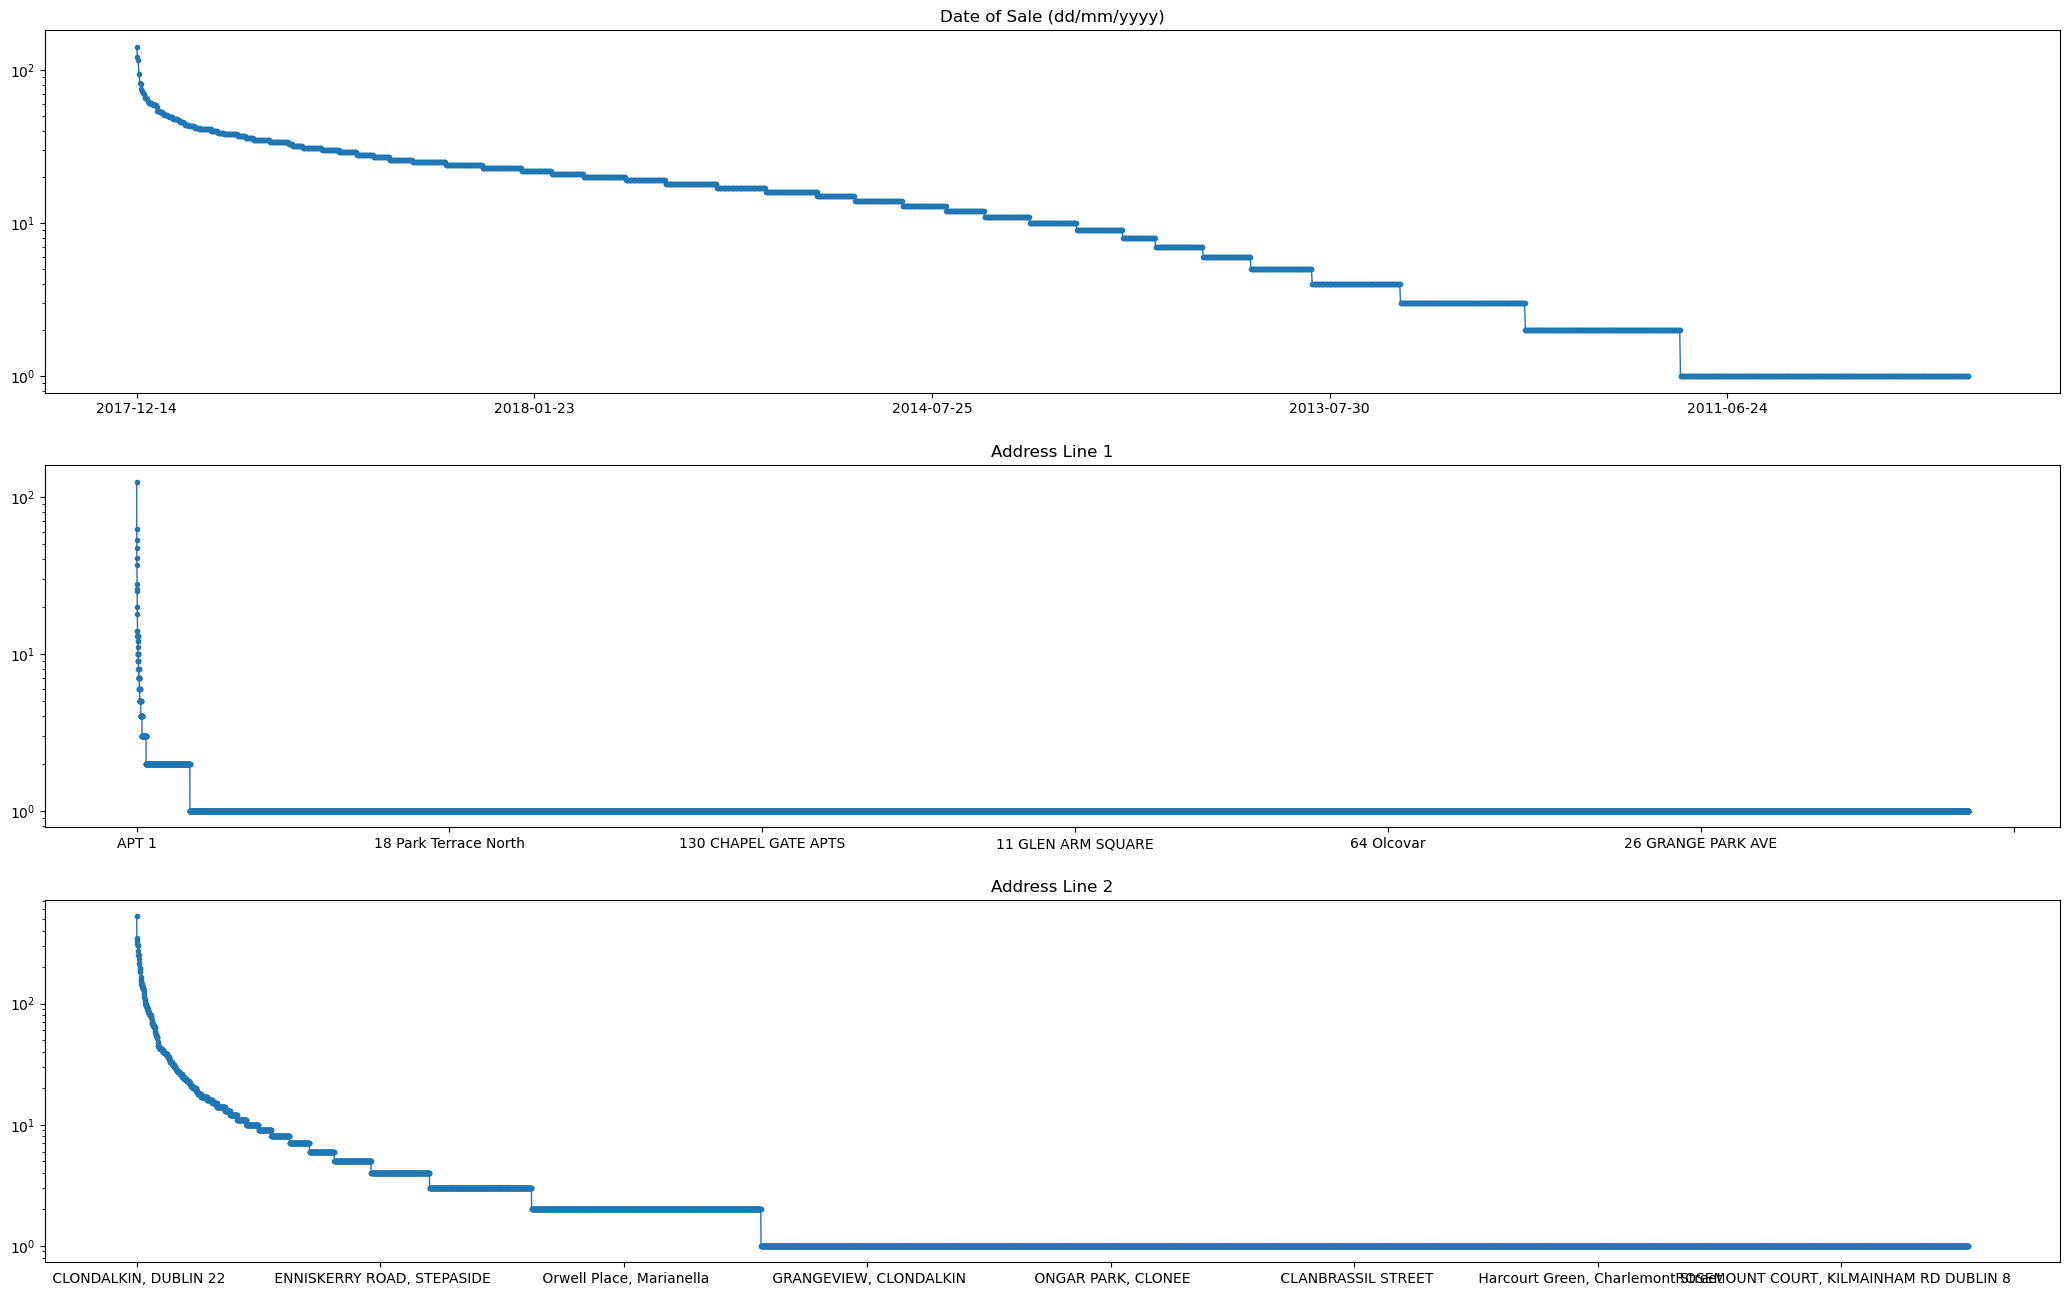

In [82]:
# Displays a global view of the dataset for non numerical features by excluding the numerical entries
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(26, 16))

# Identify non-numerical features
df_non_numerical = df2.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=1, marker=".", ax=ax)
    
plt.show();

Skewness: 1.2608242226001254
Kurtosis: 2.964501995154232


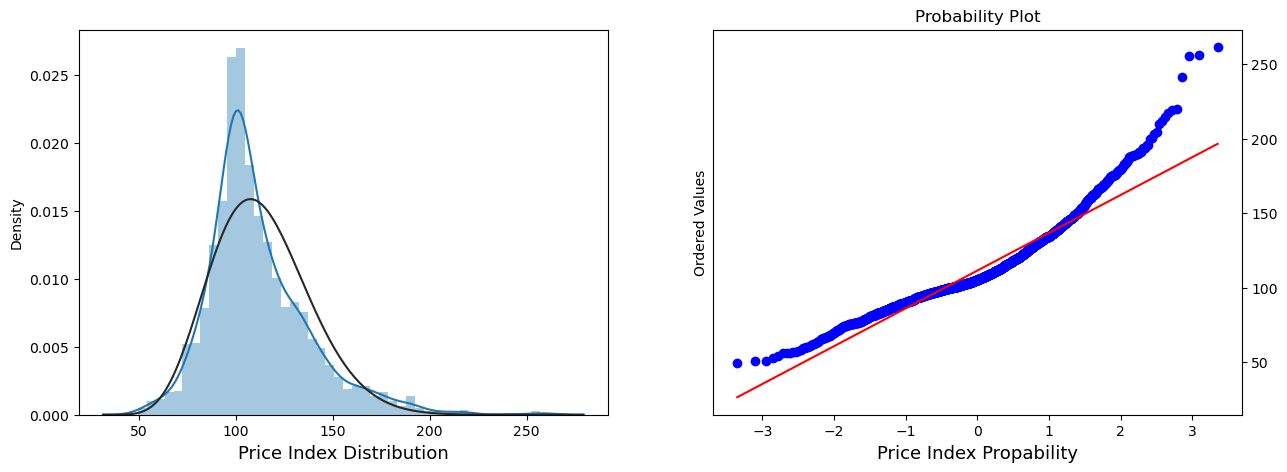

In [83]:
# Plot histogram & Probability plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(pi.Price_Index, fit=stats.gausshyper, ax=ax[0])
stats.probplot(pi.Price_Index, plot=plt)
ax[0].set_xlabel('Price Index Distribution', fontsize = 13)
ax[1].set_xlabel('Price Index Propability', fontsize = 13)
ax[1].yaxis.tick_right() # where the y axis marks will be

# Calculate skewness and kurtosis
skewness = stats.skew(pi['Price_Index'])
kurtosis = stats.kurtosis(pi['Price_Index'])

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

In [84]:
# calculate variance and standard deviation
variance = np.var(pi['Price_Index'])
std_deviation = np.std(pi['Price_Index'])

print("Variance:", variance)
print("Standard deviation:", std_deviation)

Variance: 695.6917932146929
Standard deviation: 26.37596999571187


Skewness: 1.2762276870197165
Kurtosis: 1.6184770676930196


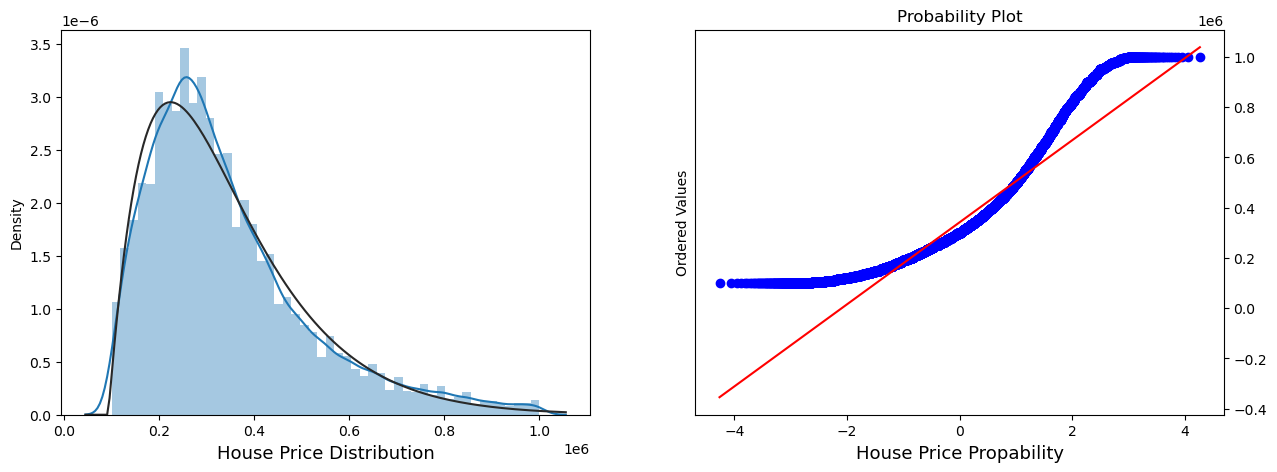

In [85]:
# Plot histogram , density plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.distplot(df1['Price (Eur)'], fit=stats.gausshyper, ax=ax[0])
stats.probplot(df1['Price (Eur)'], plot=plt)
ax[0].set_xlabel('House Price Distribution', fontsize = 13)
ax[1].set_xlabel('House Price Propability', fontsize = 13)
ax[1].yaxis.tick_right() # where the y axis marks will be

# Calculate skewness and kurtosis
skewness = stats.skew(df1['Price (Eur)'])
kurtosis = stats.kurtosis(df1['Price (Eur)'])

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

In [86]:
# calculate variance and standard deviation
variance = np.var(df1['Price (Eur)'])
std_deviation = np.std(df1['Price (Eur)'])

print("Variance:", variance)
print("Standard deviation:", std_deviation)

Variance: 29617179718.200935
Standard deviation: 172096.4256403977


# Descriptive Assessment complete, time to do some Infer'in

## Confidence Interval & T - Test

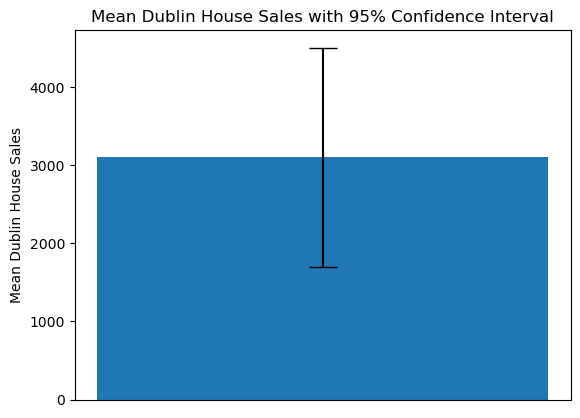

Mean house sales: 3100.70
Standard deviation of house sales: 2259.83
T-statistic: 0.14
P-value: 0.89
95% Confidence interval: (1700.04, 4501.36)


In [116]:
# Compute the number of house sales for each year
house_sales = df2.groupby('Year')['Address Line 1'].count()

# Calculate the mean and standard deviation of house sales
mean_sales = house_sales.mean()
std_sales = house_sales.std(ddof=1)

# Set the null hypothesis as the population mean being equal to 5000
null_hypothesis = 3000

# Perform a two-sided t-test
t_statistic, p_value = ttest_1samp(house_sales, null_hypothesis)

# Calculate the confidence interval
confidence_interval = (mean_sales - 1.96 * std_sales / len(house_sales)**0.5,
                       mean_sales + 1.96 * std_sales / len(house_sales)**0.5)

ci_lower = mean_sales - 1.96 * std_sales / len(house_sales)**0.5
ci_upper = mean_sales + 1.96 * std_sales / len(house_sales)**0.5

plt.bar(x=[0], height=[mean_sales], yerr=[[mean_sales - ci_lower], [ci_upper - mean_sales]], capsize=10)
plt.xticks([])
plt.title('Mean Dublin House Sales with 95% Confidence Interval')
plt.ylabel('Mean Dublin House Sales')
plt.show()

# Print the results
print("Mean house sales: {:.2f}".format(mean_sales))
print("Standard deviation of house sales: {:.2f}".format(std_sales))
print("T-statistic: {:.2f}".format(t_statistic))
print("P-value: {:.2f}".format(p_value))
print("95% Confidence interval: ({:.2f}, {:.2f})".format(confidence_interval[0], confidence_interval[1]))

In [132]:
# define the two groups of data
group_1 = df2.loc[df2['Description of Property'] == 'Second-Hand Dwelling house /Apartment', 'Year']
group_2 = df2.loc[df2['Description of Property'] == 'New Dwelling house /Apartment', 'Year']


# perform the t-test
t_statistic, p_value = ttest_ind(group_1, group_2)

# print the t-statistic and p-value
print(t_statistic)
print(p_value)

# Determine if the differences between the groups are significant
if p_value < 0.05:
    print("There is a significant difference between the means of the groups.")
else:
    print("There is no significant difference between the means of the groups.")

-5.454057810920085
4.9608953978272476e-08
There is a significant difference between the means of the groups.


### Shapiro Wilks Test

In [88]:
# Checking the null Hypothesis that my EU House Price Index data is normally Distributed
stat, p = shapiro(pi['Price_Index'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.923, p=0.000
Sample does not look Gaussian (reject H0)


In [126]:
# Checking the null Hypothesis that my Dublin House Price data is normally Distributed
stat, p = shapiro(df2['Price (Eur)'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05

if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.905, p=0.000
Sample does not look Gaussian (reject H0)


### ANOVA - Analysis of variance

### Comparing EU data by Year - First test is All EU without Ireland and Second Test is Ireland Only

In [90]:
data3 = pi.loc[pi['Geo'] != 'IE']
factor = 'Year'

# Perform the one-way ANOVA test
f_stat, p_value = stats.f_oneway(*[group['Price_Index'] for name, group in pi.groupby(factor)])

# Print the results
print(f"Factor: {factor}")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

Factor: Year
F-statistic: 138.11907215489168
P-value: 4.06929570427762e-305


In [91]:
data4 = pi.loc[pi['Geo'] == 'IE']
factor = 'Year'

# Perform the one-way ANOVA test
f_stat, p_value = stats.f_oneway(*[group['Price_Index'] for name, group in data4.groupby(factor)])

# Print the results
print(f"Factor: {factor}")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

Factor: Year
F-statistic: 122.46140362272793
P-value: 7.117707276120295e-37


In [122]:
data3 = pi['Year']

# Add some data for two groups
group1 = data3.loc[pi['Geo'] != 'IE']
group2 = data3.loc[pi['Geo'] == 'IE']

# Perform the ANOVA test
statistic, pvalue = f_oneway(group1, group2)

# Print the results
print("F-value:", statistic)
print("P-value:", pvalue)

# Determine if the differences between the groups are significant
if pvalue < 0.05:
    print("There is a significant difference between the means of the groups.")
else:
    print("There is no significant difference between the means of the groups.")

F-value: 1.25104780221836
P-value: 0.2635087248530223
There is no significant difference between the means of the groups.


### Regression Analysis & Pearson Correlation Co-Efficient

Slope: 3.2400
Intercept: -6414.2723
Correlation coefficient (r): 0.6037
P-value: 0.0000
Standard error: 0.1032


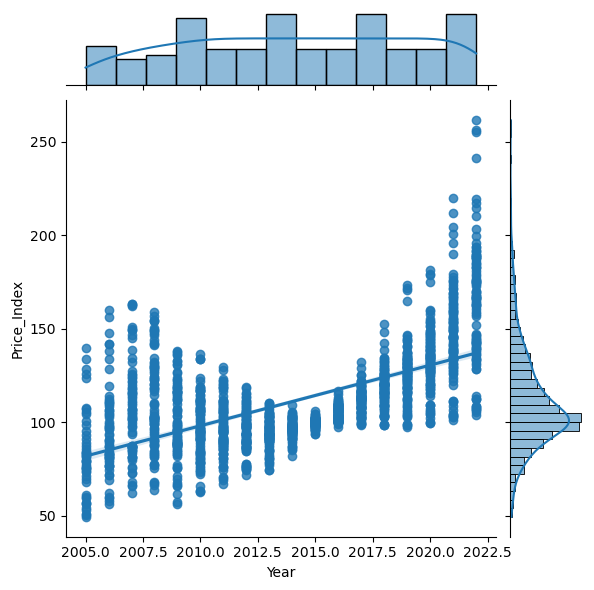

In [110]:
# Bivariate Distribution plot showing the Regression Analysis 
sns.jointplot(x = "Year", y = "Price_Index", data = pi, kind = "reg");

# Regression Analysis calcuations
slope, intercept, r_value, p_value, std_err = stats.linregress(pi['Year'], pi['Price_Index'])

# Print the regression analysis results
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"Correlation coefficient (r): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error: {std_err:.4f}")

Slope: 14755.4601
Intercept: -29410138.3926
Correlation coefficient (r): 0.1767
P-value: 0.0000
Standard error: 466.8038


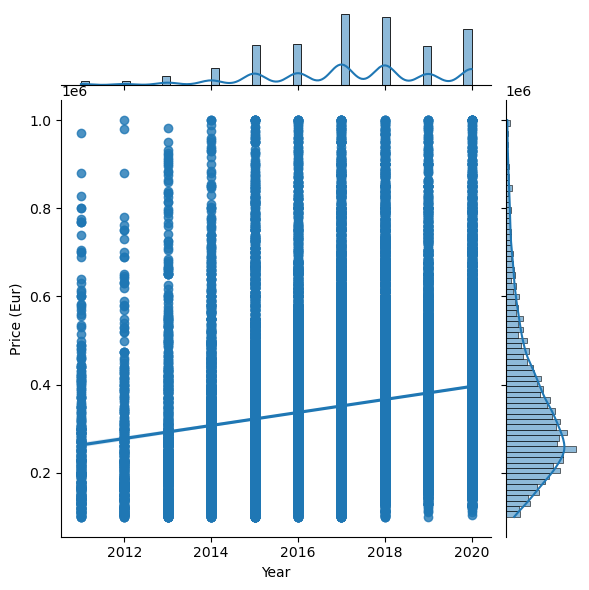

In [112]:
# Bivariate Distribution plot showing the Regression Analysis 
sns.jointplot(x = "Year", y = "Price (Eur)", data = df2, kind = "reg")

# Regression Analysis calcuations
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['Year'], df2['Price (Eur)'])

# Print the regression analysis results
print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"Correlation coefficient (r): {r_value:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Standard error: {std_err:.4f}")

### Chi-Squared Test

In [96]:
# Create a contingency table with the counts of Price Index vs Country
contingency_table2 = pd.crosstab(pi['Price_Index'], columns=pi['Geo'])

# Run the chi-squared test on the contingency table
chi2, pval, dof, expected = chi2_contingency(contingency_table2)

# Print the results
print(f'Chi-squared test statistic: {chi2:.4f}')
print(f'P-value: {pval:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-squared test statistic: 38462.8429
P-value: 0.0208
Degrees of freedom: 37900
Expected frequencies:
[[0.03021499 0.04183614 0.04183614 ... 0.04183614 0.03718768 0.03951191]
 [0.03021499 0.04183614 0.04183614 ... 0.04183614 0.03718768 0.03951191]
 [0.03021499 0.04183614 0.04183614 ... 0.04183614 0.03718768 0.03951191]
 ...
 [0.03021499 0.04183614 0.04183614 ... 0.04183614 0.03718768 0.03951191]
 [0.03021499 0.04183614 0.04183614 ... 0.04183614 0.03718768 0.03951191]
 [0.03021499 0.04183614 0.04183614 ... 0.04183614 0.03718768 0.03951191]]


In [97]:
# Create a contingency table with the counts of House Price vs Post code in Dublin
contingency_table1 = pd.crosstab(df1['Price (Eur)'], columns=df1['Postal Code'])

# Run the chi-squared test on the contingency table
chi2, pval, dof, expected = chi2_contingency(contingency_table1)

# Print the results
print(f'Chi-squared test statistic: {chi2:.4f}')
print(f'P-value: {pval:.4f}')
print(f'Degrees of freedom: {dof}')
print('Expected frequencies:')
print(expected)

Chi-squared test statistic: 208204.5440
P-value: 0.0000
Degrees of freedom: 117480
Expected frequencies:
[[7.93592751e+00 2.46157544e+00 1.15615303e+01 ... 1.36910156e+01
  1.40847307e+01 1.39101266e+01]
 [3.37699043e-02 1.04747891e-02 4.91980012e-02 ... 5.82596407e-02
  5.99350243e-02 5.91920281e-02]
 [3.37699043e-02 1.04747891e-02 4.91980012e-02 ... 5.82596407e-02
  5.99350243e-02 5.91920281e-02]
 ...
 [3.37699043e-02 1.04747891e-02 4.91980012e-02 ... 5.82596407e-02
  5.99350243e-02 5.91920281e-02]
 [3.37699043e-02 1.04747891e-02 4.91980012e-02 ... 5.82596407e-02
  5.99350243e-02 5.91920281e-02]
 [3.03929139e+00 9.42731021e-01 4.42782011e+00 ... 5.24336767e+00
  5.39415218e+00 5.32728253e+00]]


# Machine Learning Aspect

In [98]:
len(df2.index)

31007

In [99]:
# filter only area and price
df3 = df2.loc[:, ['Dub_Code', 'Price (Eur)']]
df3.head()

,Dub_Code,Price (Eur)
0,1,290500.0
1,7,290000.0
2,12,170000.0
3,7,225000.0
4,2,180000.0


In [100]:
# recaling the variables (both)
df_columns = df3.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df3)

# rename columns (since now its an np array)
df3 = pd.DataFrame(df3)
df3.columns = df_columns

df3.head()

,Dub_Code,Price (Eur)
0,1,290500.0
1,7,290000.0
2,12,170000.0
3,7,225000.0
4,2,180000.0


<AxesSubplot:xlabel='Dub_Code', ylabel='Price (Eur)'>

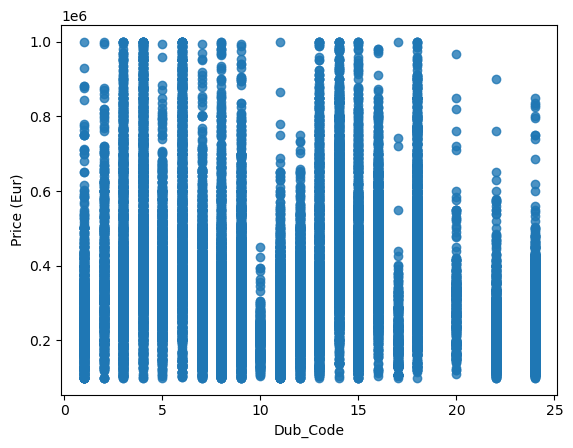

In [101]:
# visualise area-price relationship
sns.regplot(x="Dub_Code", y="Price (Eur)", data=df3, fit_reg=False)

In [102]:
# split into train and test
df_train, df_test = train_test_split(df3, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 10)
print(len(df_train))
print(len(df_test))

21704
9303


In [103]:
# split into X and y for both train and test sets
# reshaping is required since sklearn requires the data to be in shape
# (n, 1), not as a series of shape (n, )
X_train = df_train['Dub_Code']
X_train = X_train.values.reshape(-1, 1)
y_train = df_train['Price (Eur)']

X_test = df_test['Dub_Code']
X_test = X_test.values.reshape(-1, 1)
y_test = df_test['Price (Eur)']

In [104]:
len(X_train)

21704

In [105]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

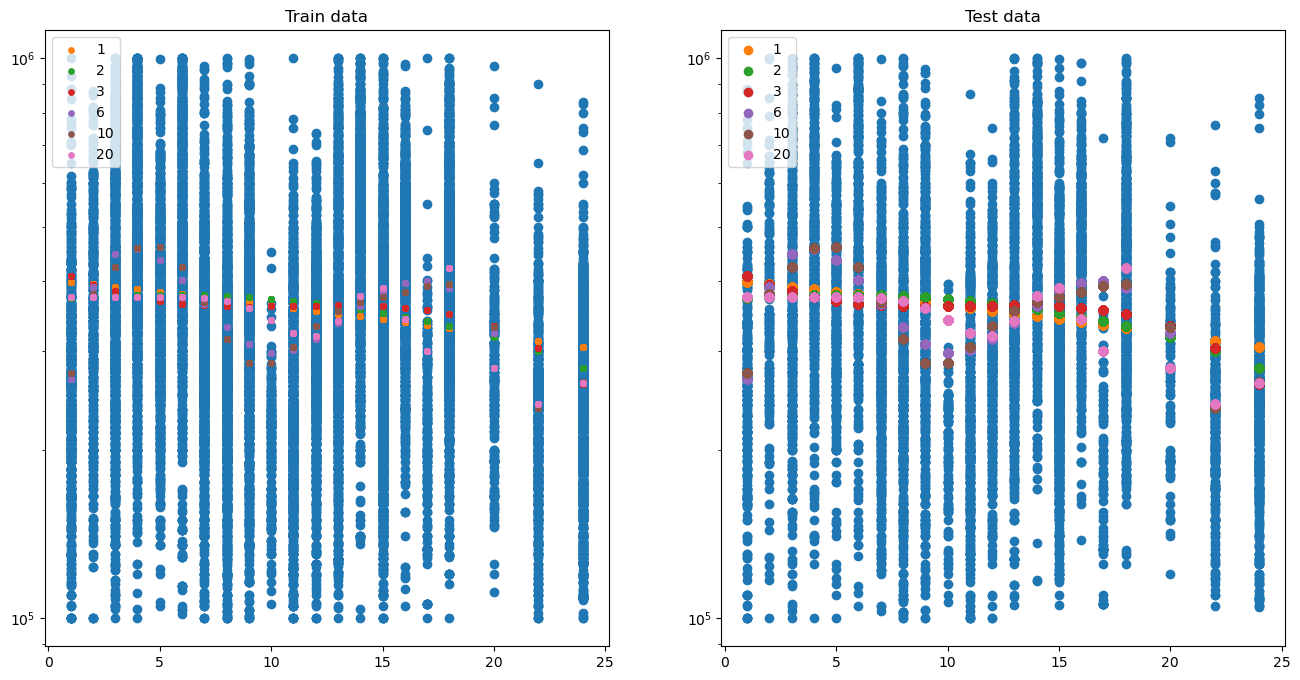

In [106]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [107]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=0.02, test score=0.02
Polynomial degree 2: train score=0.03, test score=0.03
Polynomial degree 3: train score=0.03, test score=0.03
Polynomial degree 6: train score=0.12, test score=0.11
Polynomial degree 10: train score=0.12, test score=0.11
Polynomial degree 20: train score=0.07, test score=0.06
